In [1]:
import pandas as pd
import numpy as np
import os  
print("文件列表：",os.listdir("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-1921-g2"))
data = pd.ExcelFile("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/Embeded_FS/EmbededFS_results.xlsx")
sheet_names = data.sheet_names
print("列表名：",sheet_names )

文件列表： ['.ipynb_checkpoints', 'CatBoost-FS-767cases-1921-2023.ipynb', 'catboost_info', 'EGFR_subtypes_prediction_134cases_1921_newKNN19.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newKNN191.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newLR19.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newLR191.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newNB17.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newNB171.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF11.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF111.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF18.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF181.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF2-25.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF2-251.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newSTACK18.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newSTACK181.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newSVM12.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newSVM121.ipyn

In [2]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [3]:
# data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/RFE.xlsx", sheet_name='g1rfegb12')
name = 'STACK18'
data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/Embeded_FS/EmbededFS_results.xlsx", sheet_name=name)

data.keys()
train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/train-zscore.csv")
test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/test-Zscore.csv")
# test1 = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testrj1921new_zscore.csv")
train=train[data.keys()]
train.shape
test=test[data.keys()]
test.shape
# test1=test1[data.keys()]
# test1.shape

train.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/new-auc/trainZscore-STACK18.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF5.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF11.csv",index=None)


# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF19.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF5.csv",index=None)
test.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/new-auc/testZscore-STACK18.csv",index=None)


# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF19.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF5.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/new2023/testrjZscore-SVM20.csv",index=None)



In [4]:
test.shape

(29, 19)

In [5]:
#%% load liabrary
import os
import numpy as np
import xlrd
import scipy.io as io
import pandas as pd
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.model_selection import cross_val_score,ShuffleSplit, train_test_split
from sklearn.linear_model import Lasso, Ridge, LassoCV,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
import itertools
import joblib
from scipy import stats
from sklearn import preprocessing
print("Import library done.\n")

Import library done.



In [7]:
# DIABETES PREDICTION MODEL

# CLASSIFICATION MODELS - HOLDOUT

'''
Steps to follow:
    - Load the saved dataset
    - General View
    - Modeling
        - Base models: LogisticRegression, GaussianNB, KNeighborsClassifier, SVC, MLPClassifier, DecisionTreeClassifier,
                       BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
                       XGBClassifier, LGBMClassifier, CatBoostClassifier, NGBClassifier
    - Model Evaluation
    - Model Tuning
    - Model Results
'''

# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Load the preprocessed dataset
# diabetes_preprocessed = pd.read_csv('./diabetes_prepared.csv')

# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-1.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFEGB8.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-42.csv",index=None)

# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rferf17.csv")
# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rfegb5.csv")
pathdata="C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/new-auc/trainZscore-STACK18.csv"
diabetes_preprocessed = pd.read_csv(pathdata)




# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
df = diabetes_preprocessed.copy()
# df = df.drop(columns="id",axis=1)

## GENERAL VIEW

df.head()
df.shape
df.info()
df.columns
df.index
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 19 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   CT_wavelet-LLH_glszm_ZoneEntropy                  104 non-null    float64
 1   CT_wavelet-HLH_firstorder_Median                  104 non-null    float64
 2   CT_original_shape_Sphericity                      104 non-null    float64
 3   CT_original_glcm_Imc1                             104 non-null    float64
 4   CT_wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis  104 non-null    float64
 5   CT_wavelet2-LHL_glcm_ClusterShade                 104 non-null    float64
 6   CT_wavelet2-LHH_firstorder_Mean                   104 non-null    float64
 7   CT_wavelet2-LLL_firstorder_10Percentile           104 non-null    float64
 8   CT_wavelet-HLH_glcm_ClusterShade                  104 non-null    float64
 9   CT_original_shape_Lea

count   mean   std    min  \
CT_wavelet-LLH_glszm_ZoneEntropy                 104.000 -0.000 1.005 -4.120   
CT_wavelet-HLH_firstorder_Median                 104.000  0.000 1.005 -6.896   
CT_original_shape_Sphericity                     104.000  0.000 1.005 -2.389   
CT_original_glcm_Imc1                            104.000 -0.000 1.005 -2.589   
CT_wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis 104.000 -0.000 1.005 -0.823   
CT_wavelet2-LHL_glcm_ClusterShade                104.000 -0.000 1.005 -5.317   
CT_wavelet2-LHH_firstorder_Mean                  104.000  0.000 1.005 -2.348   
CT_wavelet2-LLL_firstorder_10Percentile          104.000 -0.000 1.005 -1.052   
CT_wavelet-HLH_glcm_ClusterShade                 104.000 -0.000 1.005 -5.272   
CT_original_shape_LeastAxisLength                104.000  0.000 1.005 -0.791   
CT_wavelet-LLH_firstorder_Kurtosis               104.000 -0.000 1.005 -1.116   
CT_wavelet2-LHL_firstorder_Skewness              104.000 -0.000 1.005 -3.021   
CT_wavelet2-LLL_firstorder_Maximum               104.000  0.000 1.005 -3.008   
CT_original_glcm_Autocorrelation                 104.000  0.000 1.005 -2.267   
CT_wavelet-LHH_firstorder_Maximum                104.000  0.000 1.005 -1.563   
CT_wavelet2-HHL_firstorder_Mean                  104.000 -0.000 1.005 -2.550   
PET_original_shape_Flatness                      104.000  0.000 1.005 -2.612   
CT_original_firstorder_Maximum                   104.000 -0.000 1.005 -1.344   
label                                            104.000  0.490 0.502  0.000   

                                                    10%    25%    50%   75%  \
CT_wavelet-LLH_glszm_ZoneEntropy                 -1.341 -0.506  0.196 0.639   
CT_wavelet-HLH_firstorder_Median                 -0.442 -0.055  0.089 0.274   
CT_original_shape_Sphericity                     -1.402 -0.814  0.119 0.768   
CT_original_glcm_Imc1                            -1.472 -0.561  0.144 0.700   
CT_wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis -0.771 -0.698 -0.350 0.294   
CT_wavelet2-LHL_glcm_ClusterShade                -0.551 -0.186  0.067 0.206   
CT_wavelet2-LHH_firstorder_Mean                  -1.135 -0.412 -0.019 0.244   
CT_wavelet2-LLL_firstorder_10Percentile          -0.737 -0.588 -0.312 0.148   
CT_wavelet-HLH_glcm_ClusterShade                 -0.432 -0.075  0.012 0.053   
CT_original_shape_LeastAxisLength                -0.710 -0.706 -0.256 0.339   
CT_wavelet-LLH_firstorder_Kurtosis               -0.667 -0.505 -0.274 0.093   
CT_wavelet2-LHL_firstorder_Skewness              -1.178 -0.282  0.095 0.511   
CT_wavelet2-LLL_firstorder_Maximum               -0.566 -0.324 -0.098 0.154   
CT_original_glcm_Autocorrelation                 -1.318 -0.680  0.016 0.835   
CT_wavelet-LHH_firstorder_Maximum                -1.171 -0.833 -0.093 0.629   
CT_wavelet2-HHL_firstorder_Mean                  -0.969 -0.399 -0.117 0.168   
PET_original_shape_Flatness                      -1.551 -0.647  0.261 0.751   
CT_original_firstorder_Maximum                   -0.643 -0.578 -0.200 0.098   
label                                             0.000  0.000  0.000 1.000   

                                                   90%   95%   99%   max  
CT_wavelet-LLH_glszm_ZoneEntropy                 0.940 1.288 1.958 2.266  
CT_wavelet-HLH_firstorder_Median                 0.556 0.861 1.947 2.583  
CT_original_shape_Sphericity                     1.259 1.517 1.803 1.988  
CT_original_glcm_Imc1                            1.279 1.446 1.638 1.726  
CT_wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis 1.148 2.034 3.878 4.222  
CT_wavelet2-LHL_glcm_ClusterShade                0.514 0.879 3.192 4.156  
CT_wavelet2-LHH_firstorder_Mean                  0.528 1.177 4.568 5.896  
CT_wavelet2-LLL_firstorder_10Percentile          1.319 1.651 4.196 4.272  
CT_wavelet-HLH_glcm_ClusterShade                 0.178 0.488 2.688 7.505  
CT_original_shape_LeastAxisLength                0.965 1.547 3.281 6.062  
CT_wavelet-LLH_firstorder_Kurtosis          

In [8]:
# Check for missing values
df.isnull().values.any()
df.isnull().sum().sort_values(ascending=False)


CT_wavelet-LLH_glszm_ZoneEntropy                    0
CT_wavelet-LLH_firstorder_Kurtosis                  0
CT_original_firstorder_Maximum                      0
PET_original_shape_Flatness                         0
CT_wavelet2-HHL_firstorder_Mean                     0
CT_wavelet-LHH_firstorder_Maximum                   0
CT_original_glcm_Autocorrelation                    0
CT_wavelet2-LLL_firstorder_Maximum                  0
CT_wavelet2-LHL_firstorder_Skewness                 0
CT_original_shape_LeastAxisLength                   0
CT_wavelet-HLH_firstorder_Median                    0
CT_wavelet-HLH_glcm_ClusterShade                    0
CT_wavelet2-LLL_firstorder_10Percentile             0
CT_wavelet2-LHH_firstorder_Mean                     0
CT_wavelet2-LHL_glcm_ClusterShade                   0
CT_wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis    0
CT_original_glcm_Imc1                               0
CT_original_shape_Sphericity                        0
label                       

In [22]:
# See the results for base models

base_models = [('LogisticRegression', LogisticRegression()),
               ('Naive Bayes', GaussianNB()),
               ('KNN', KNeighborsClassifier()),
               ('SVM', SVC()),
               ('ANN', MLPClassifier()),
               ('CART', DecisionTreeClassifier()),
               ('BaggedTrees', BaggingClassifier()),
               ('RF', RandomForestClassifier()),
               ('AdaBoost', AdaBoostClassifier()),
               ('GBM', GradientBoostingClassifier()),
               ("XGBoost", XGBClassifier()),
               ("LightGBM", LGBMClassifier()),
               ("CatBoost", CatBoostClassifier(verbose=False)),
               ("NGBoost", NGBClassifier(verbose=False))]

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.572727
Naive Bayes: 0.759091
KNN: 0.709091
SVM: 0.759091
ANN: 0.618182
CART: 0.713636
BaggedTrees: 0.713636
RF: 0.713636
AdaBoost: 0.713636
GBM: 0.622727
XGBoost: 0.759091
LightGBM: 0.522727
CatBoost: 0.759091
NGBoost: 0.713636

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.723          0.573
1          Naive Bayes           0.698          0.759
2                  KNN           0.614          0.709
3                  SVM           0.819          0.759
4                  ANN           0.976          0.618
5                 CART           1.000          0.714
6          BaggedTrees           0.988          0.714
7                   RF           1.000          0.714
8             AdaBoost           1.000          0.714
9                  GBM           1.000          0.623
10

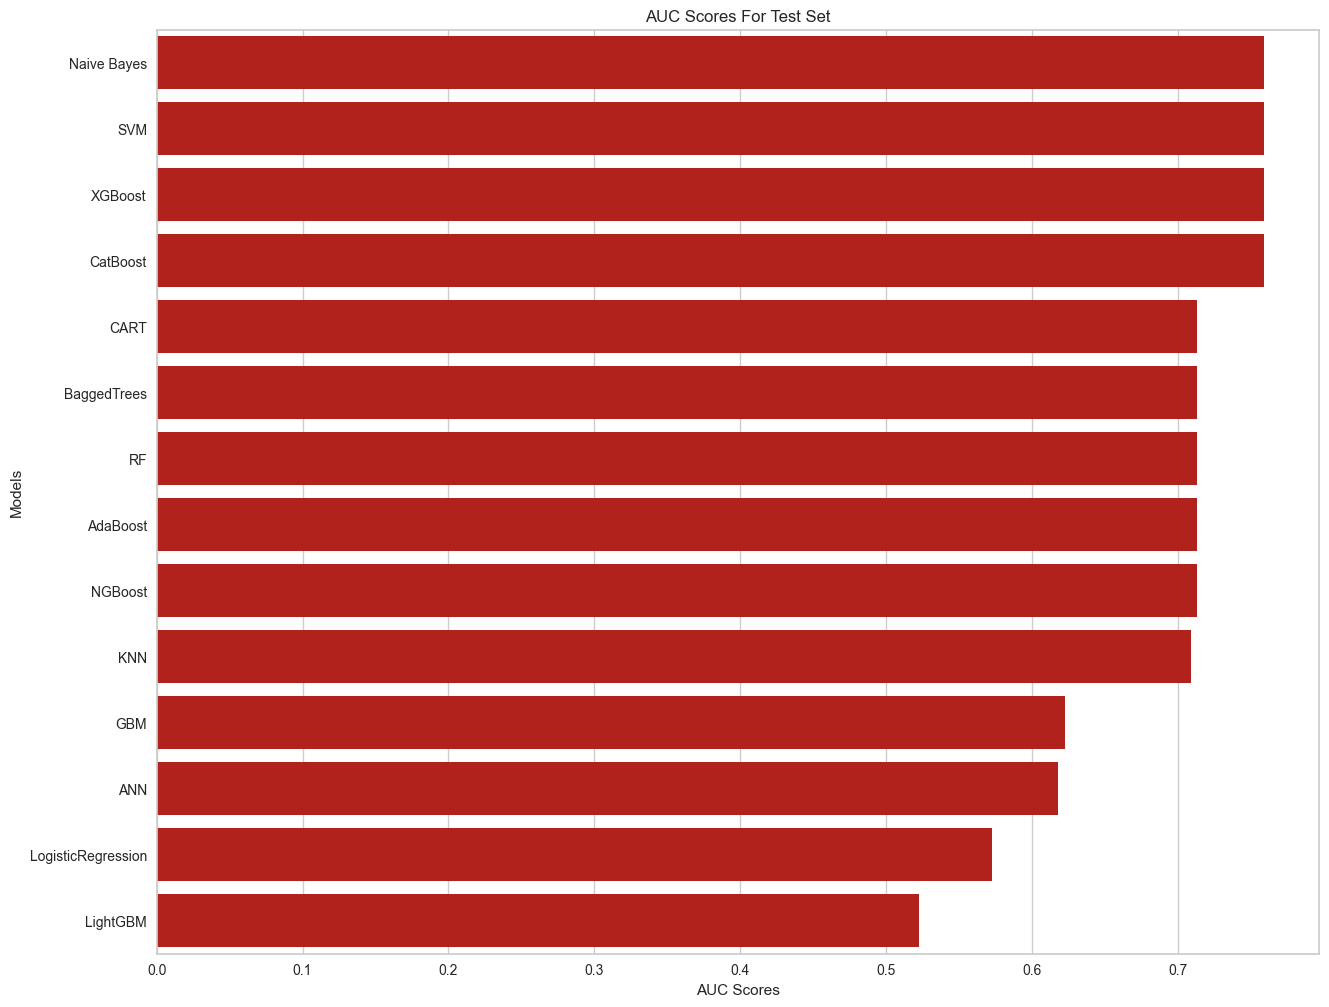

In [23]:
evaluate_classification_model_holdout(base_models)


In [24]:
# For some distance-based models, we need to scale the features in order to
# increase the speed and the performance/accuracy level of the model.
# We can also see the effect of scaling type by changing the sclaer function.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

In [81]:
# Final Model
logreg_tuned = LogisticRegression(**logreg_cv_model.best_params_).fit(X_train, y_train)
y_pred = logreg_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8051948051948052
roc_auc_score(y_test, y_pred)

0.5272727272727273

In [82]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-STACK18-LR73', Save_format = 'csv',Save_type = 'col')

In [83]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-STACK18-LR73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.56      0.45      0.50        11
    EGFR E21       0.50      0.60      0.55        10

    accuracy                           0.52        21
   macro avg       0.53      0.53      0.52        21
weighted avg       0.53      0.52      0.52        21

precision 0.5 accuracy 0.5238095238095238 recall 0.6 auc 0.5272727272727273


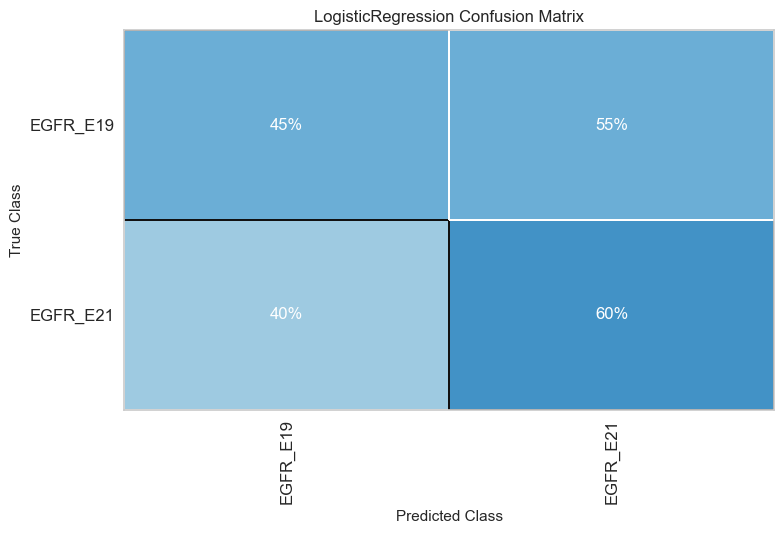

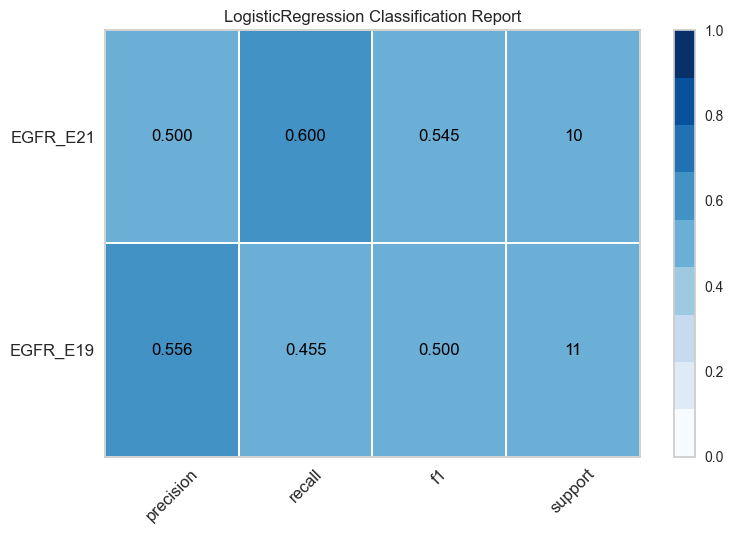

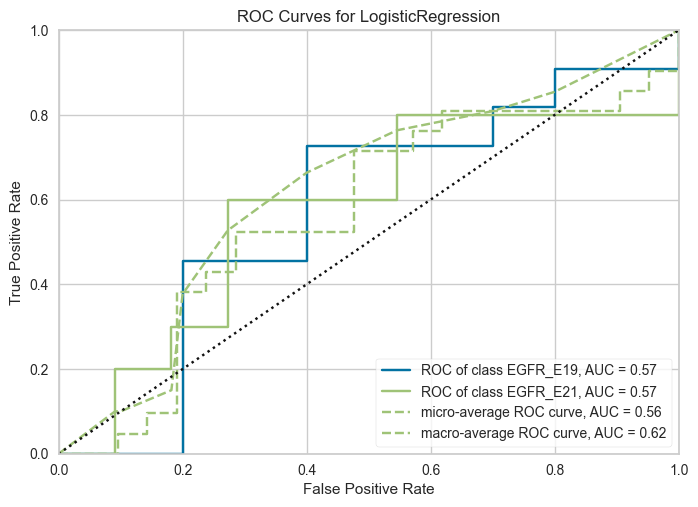

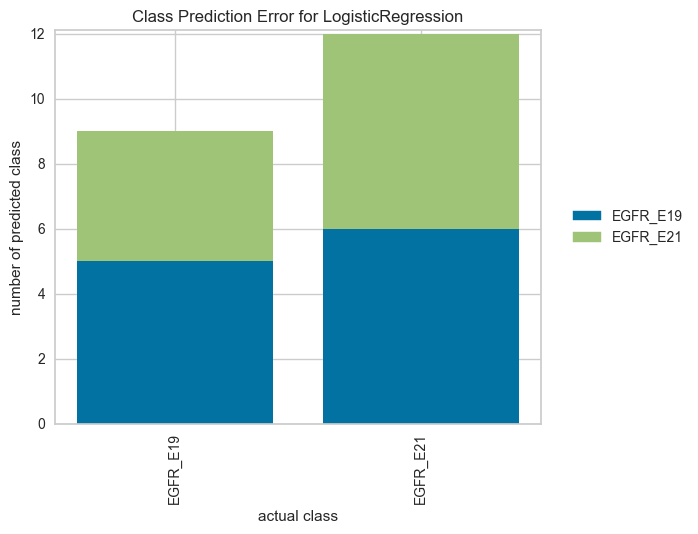

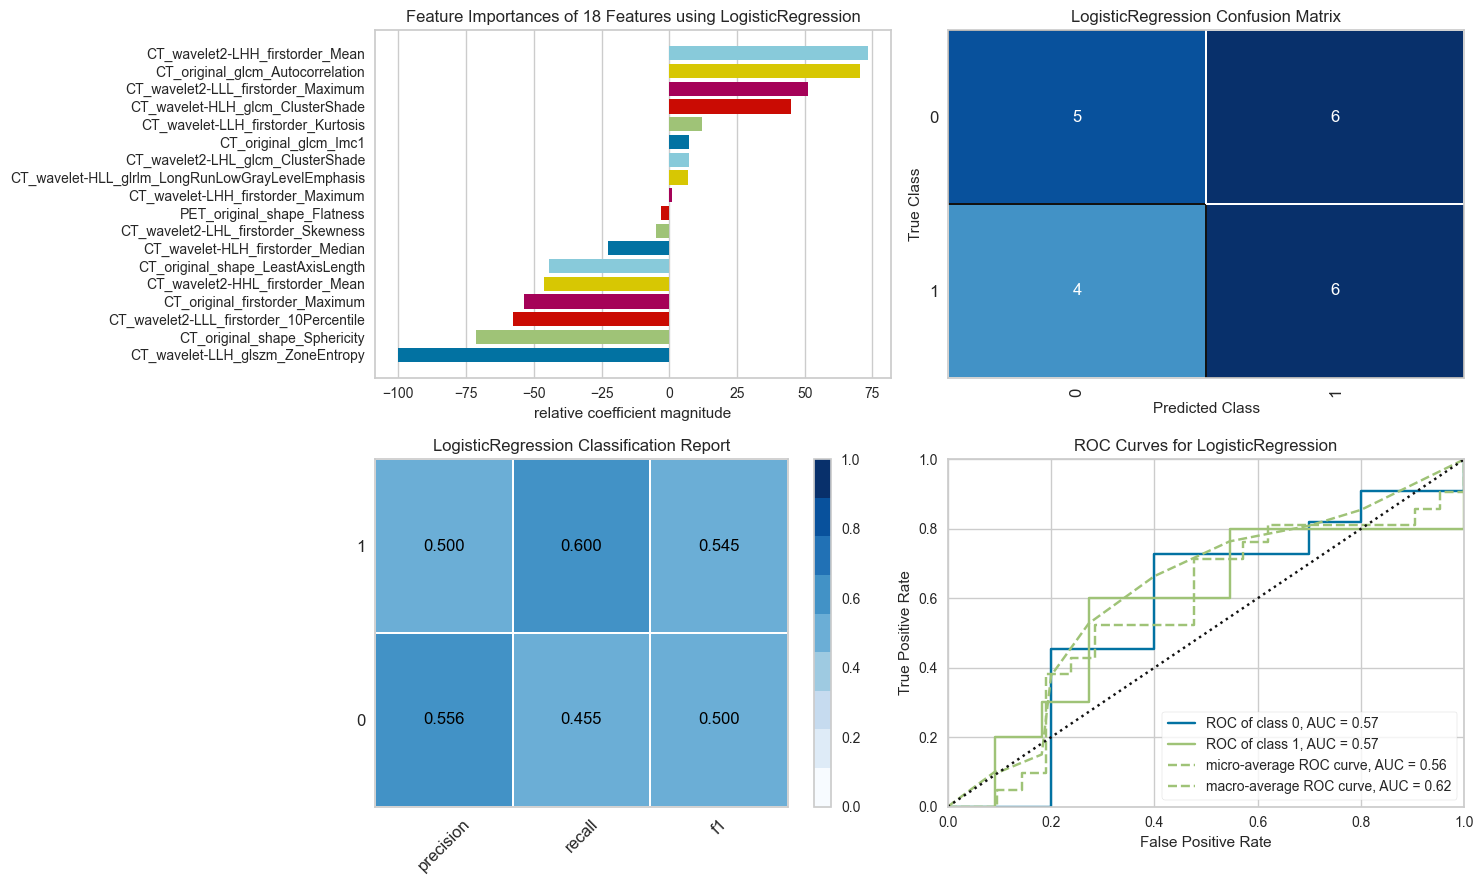

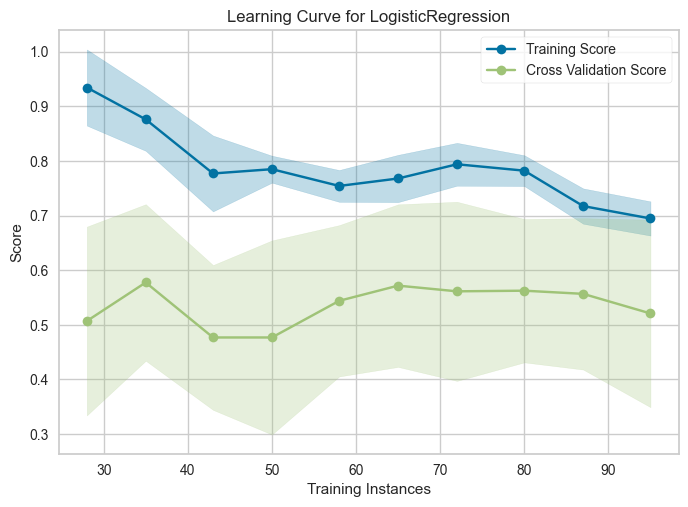

In [84]:
# Visualization of Results
# plot_feature_importances(logreg_tuned)
plot_results(logreg_tuned)
report_results_quickly(logreg_tuned)
plot_learning_curve(logreg_tuned)


In [86]:
# Final Model
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score(y_test, y_pred)

0.759090909090909

In [87]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-STACK18-RF73', Save_format = 'csv',Save_type = 'col')

In [88]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-STACK18-RF73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.75      0.82      0.78        11
    EGFR E21       0.78      0.70      0.74        10

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.76      0.76      0.76        21

precision 0.7777777777777778 accuracy 0.7619047619047619 recall 0.7 auc 0.759090909090909


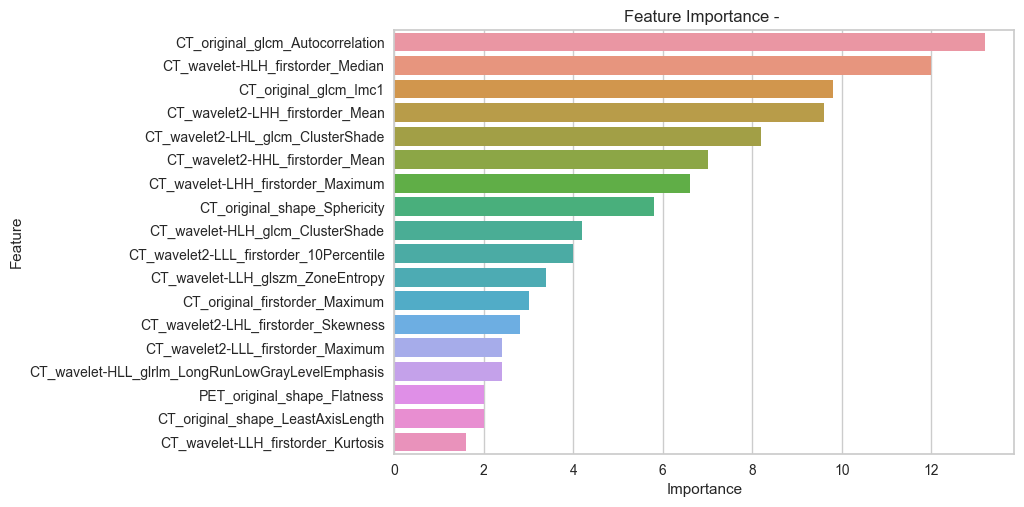

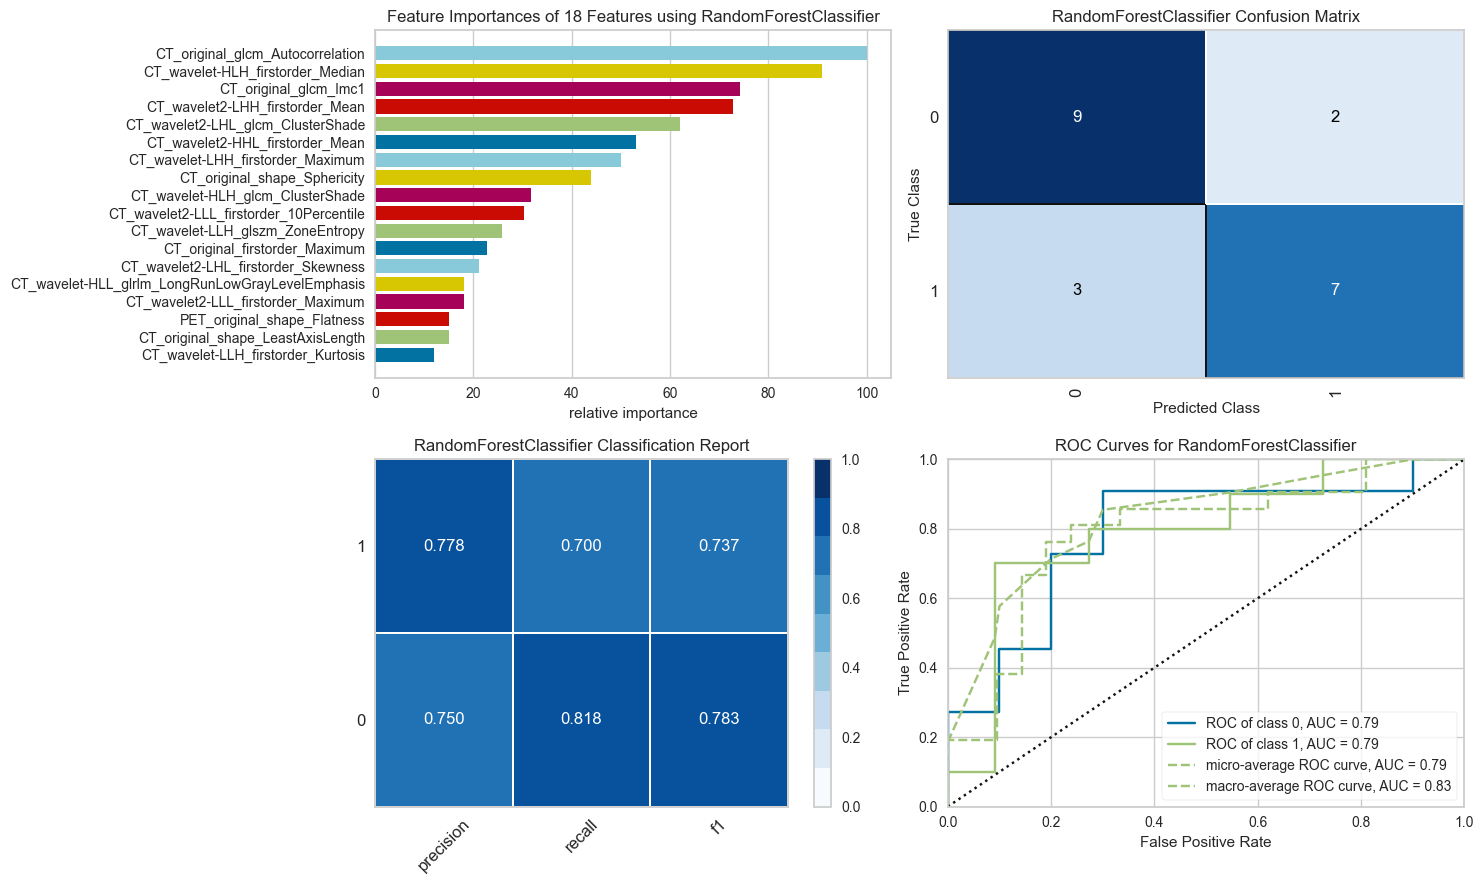

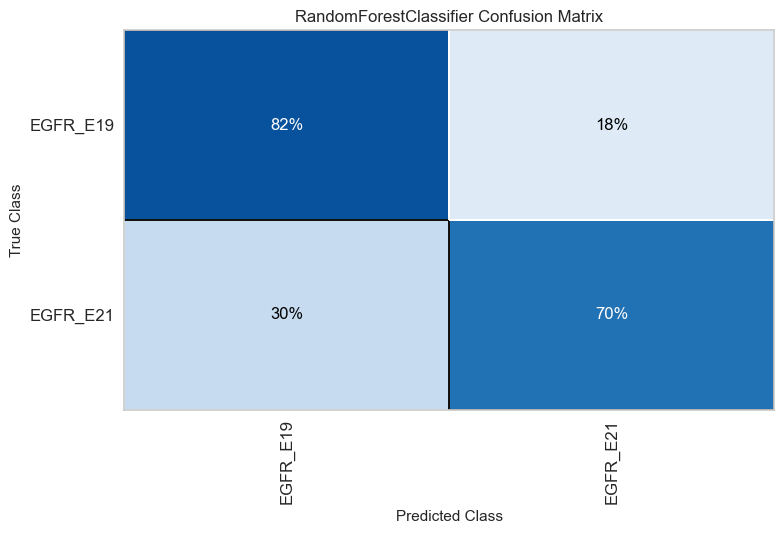

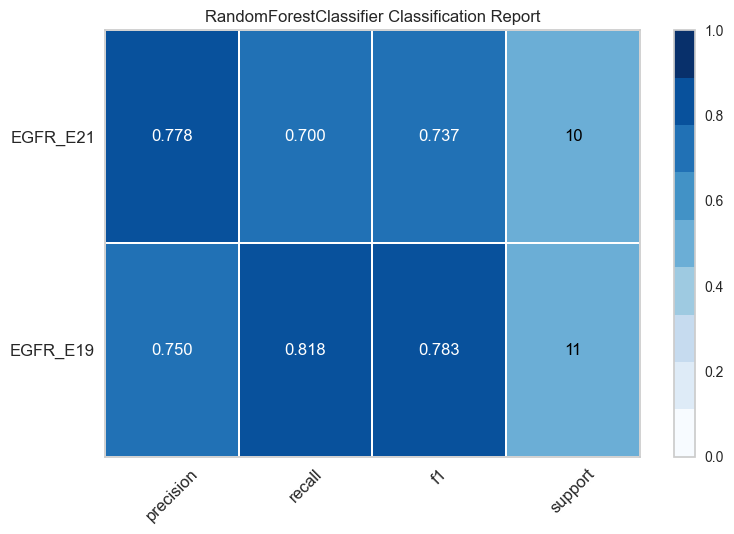

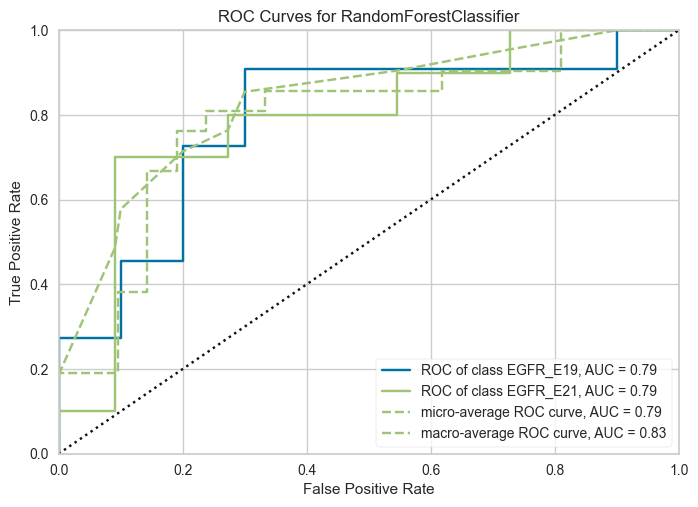

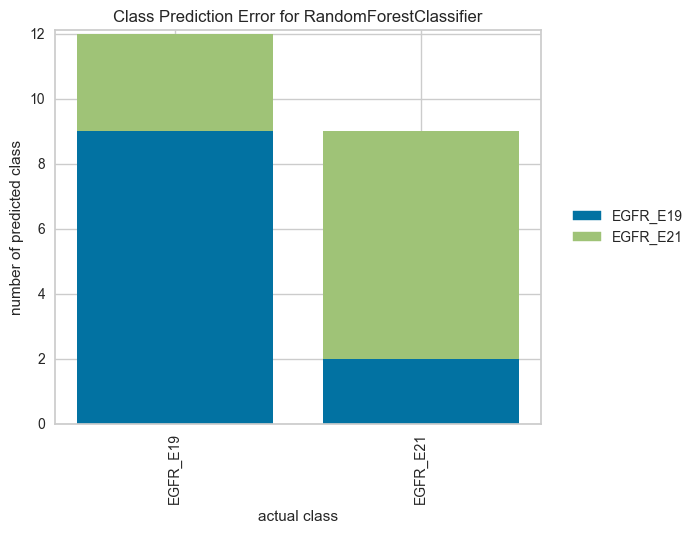

KeyboardInterrupt: 

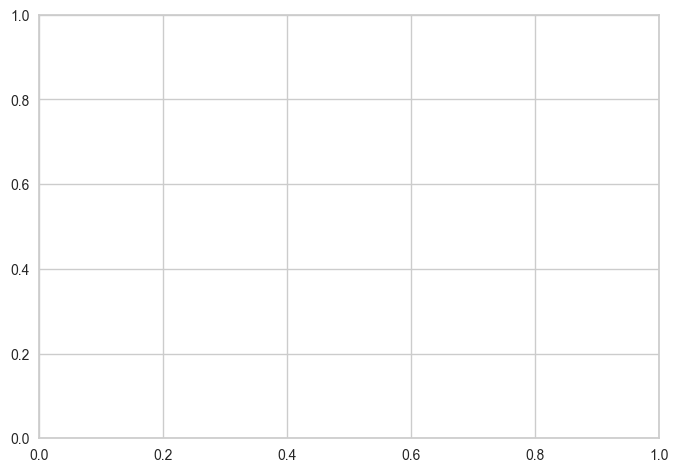

In [89]:
# Visualization of Results --> Feature Importances
plot_feature_importances(rf_tuned)
report_results_quickly(rf_tuned)
plot_results(rf_tuned)
plot_learning_curve(rf_tuned)

In [90]:
# Final Model
cb_tuned = CatBoostClassifier(**cb_cv_model.best_params_).fit(X_train, y_train,use_best_model=True)

y_pred = cb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 0.6249825	total: 9.82ms	remaining: 2.94s
1:	learn: 0.5452868	total: 10.9ms	remaining: 1.62s
2:	learn: 0.4903746	total: 11.8ms	remaining: 1.17s
3:	learn: 0.4229120	total: 12.7ms	remaining: 938ms
4:	learn: 0.3670267	total: 13.5ms	remaining: 794ms
5:	learn: 0.3473574	total: 14.2ms	remaining: 695ms
6:	learn: 0.3053067	total: 14.9ms	remaining: 625ms
7:	learn: 0.2876676	total: 15.6ms	remaining: 571ms
8:	learn: 0.2696424	total: 16.4ms	remaining: 529ms
9:	learn: 0.2429666	total: 17.1ms	remaining: 496ms
10:	learn: 0.2066484	total: 17.8ms	remaining: 469ms
11:	learn: 0.1810604	total: 18.6ms	remaining: 447ms
12:	learn: 0.1609884	total: 19.3ms	remaining: 427ms
13:	learn: 0.1526788	total: 20.1ms	remaining: 410ms
14:	learn: 0.1377237	total: 20.8ms	remaining: 395ms
15:	learn: 0.1227085	total: 21.6ms	remaining: 383ms
16:	learn: 0.1097746	total: 22.3ms	remaining: 371ms
17:	learn: 0.1036721	total: 23.2ms	remaining: 363ms
18:	learn: 0.0956183	total: 23.9ms	remaining: 354ms
19:	learn: 0.0867895	t

218:	learn: 0.0023507	total: 168ms	remaining: 62.3ms
219:	learn: 0.0023506	total: 169ms	remaining: 61.5ms
220:	learn: 0.0023508	total: 170ms	remaining: 60.7ms
221:	learn: 0.0023508	total: 170ms	remaining: 59.9ms
222:	learn: 0.0023505	total: 171ms	remaining: 59.1ms
223:	learn: 0.0023498	total: 172ms	remaining: 58.3ms
224:	learn: 0.0023435	total: 172ms	remaining: 57.5ms
225:	learn: 0.0023431	total: 173ms	remaining: 56.7ms
226:	learn: 0.0023431	total: 174ms	remaining: 55.9ms
227:	learn: 0.0023428	total: 174ms	remaining: 55.1ms
228:	learn: 0.0023426	total: 175ms	remaining: 54.3ms
229:	learn: 0.0023364	total: 176ms	remaining: 53.5ms
230:	learn: 0.0023217	total: 177ms	remaining: 52.7ms
231:	learn: 0.0023114	total: 177ms	remaining: 52ms
232:	learn: 0.0023084	total: 178ms	remaining: 51.2ms
233:	learn: 0.0022965	total: 179ms	remaining: 50.4ms
234:	learn: 0.0022822	total: 179ms	remaining: 49.6ms
235:	learn: 0.0022683	total: 180ms	remaining: 48.8ms
236:	learn: 0.0022682	total: 181ms	remaining: 48

0.7142857142857143

In [31]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [32]:
# shap.dependence_plot(y_train, shap_values, X_train)

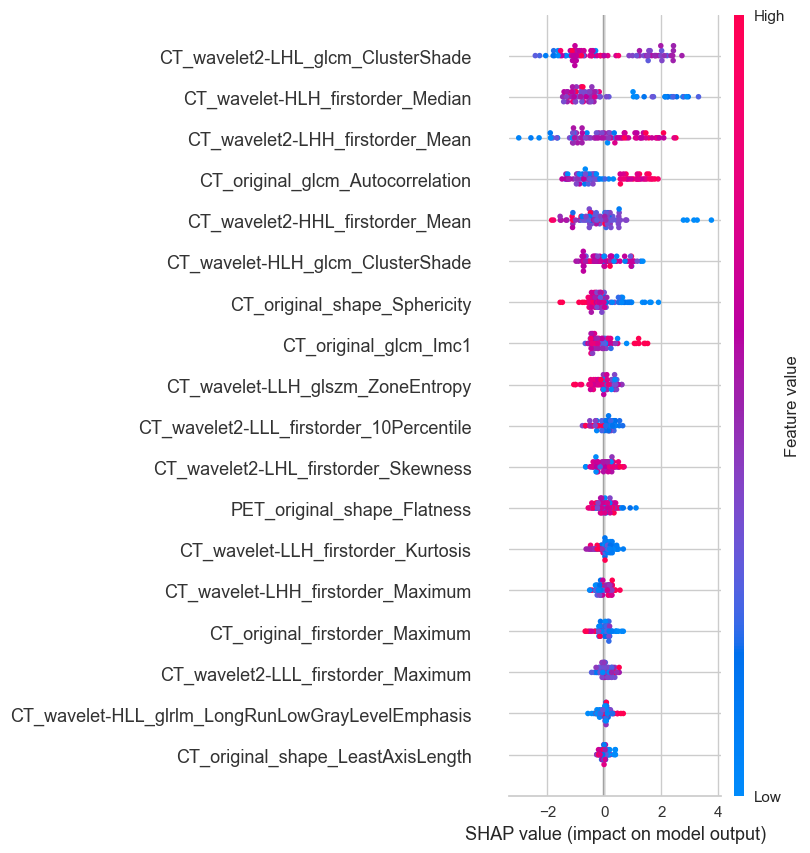

In [33]:

shap.summary_plot(shap_values, X_train)

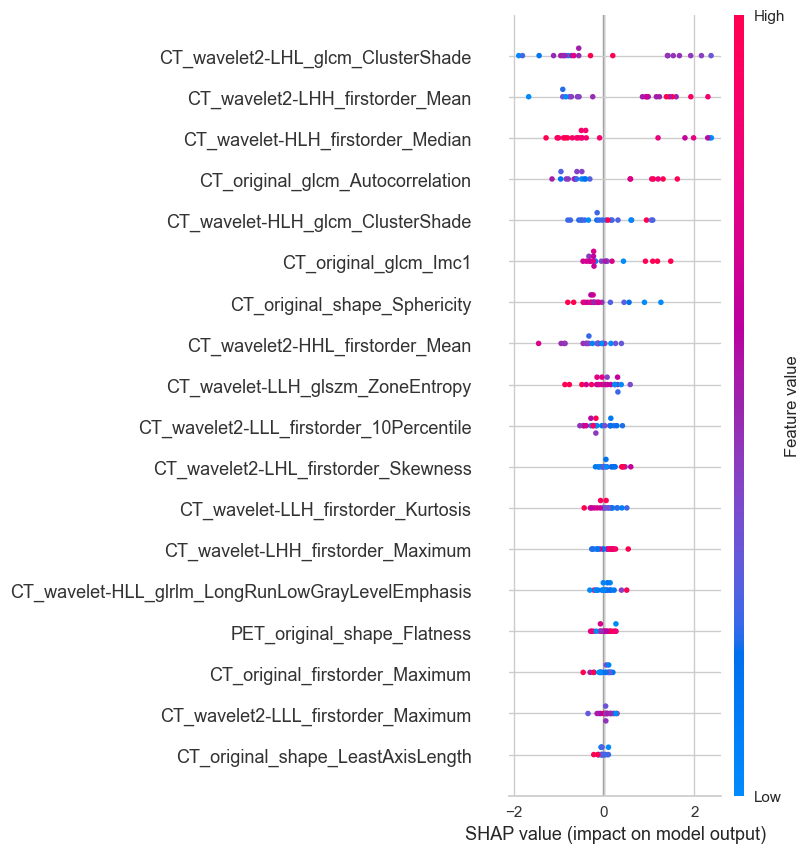

In [34]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [35]:
import shap
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [36]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-STACK18-CBC73', Save_format = 'csv',Save_type = 'col')

In [37]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-STACK18-CBC73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.78      0.64      0.70        11
    EGFR E21       0.67      0.80      0.73        10

    accuracy                           0.71        21
   macro avg       0.72      0.72      0.71        21
weighted avg       0.72      0.71      0.71        21

precision 0.6666666666666666 accuracy 0.7142857142857143 recall 0.8 auc 0.7181818181818183


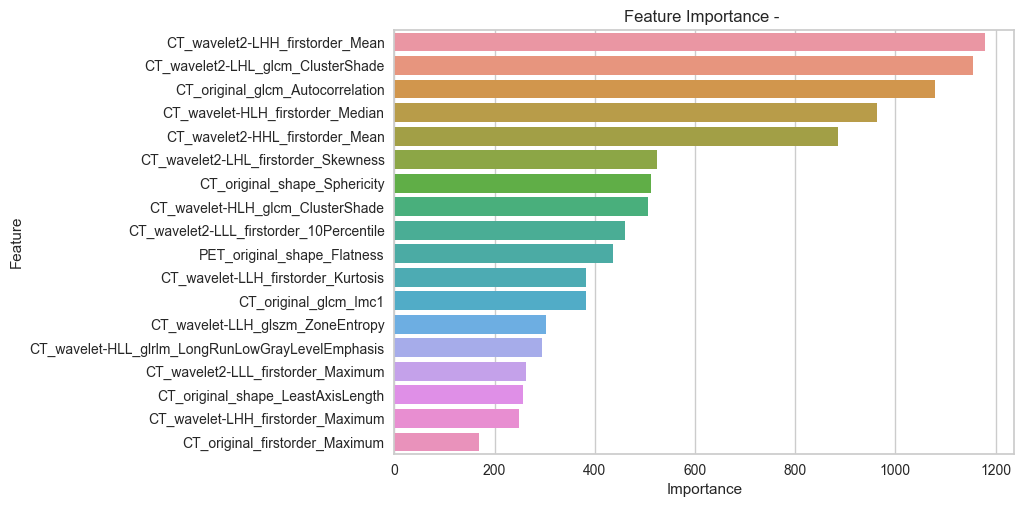

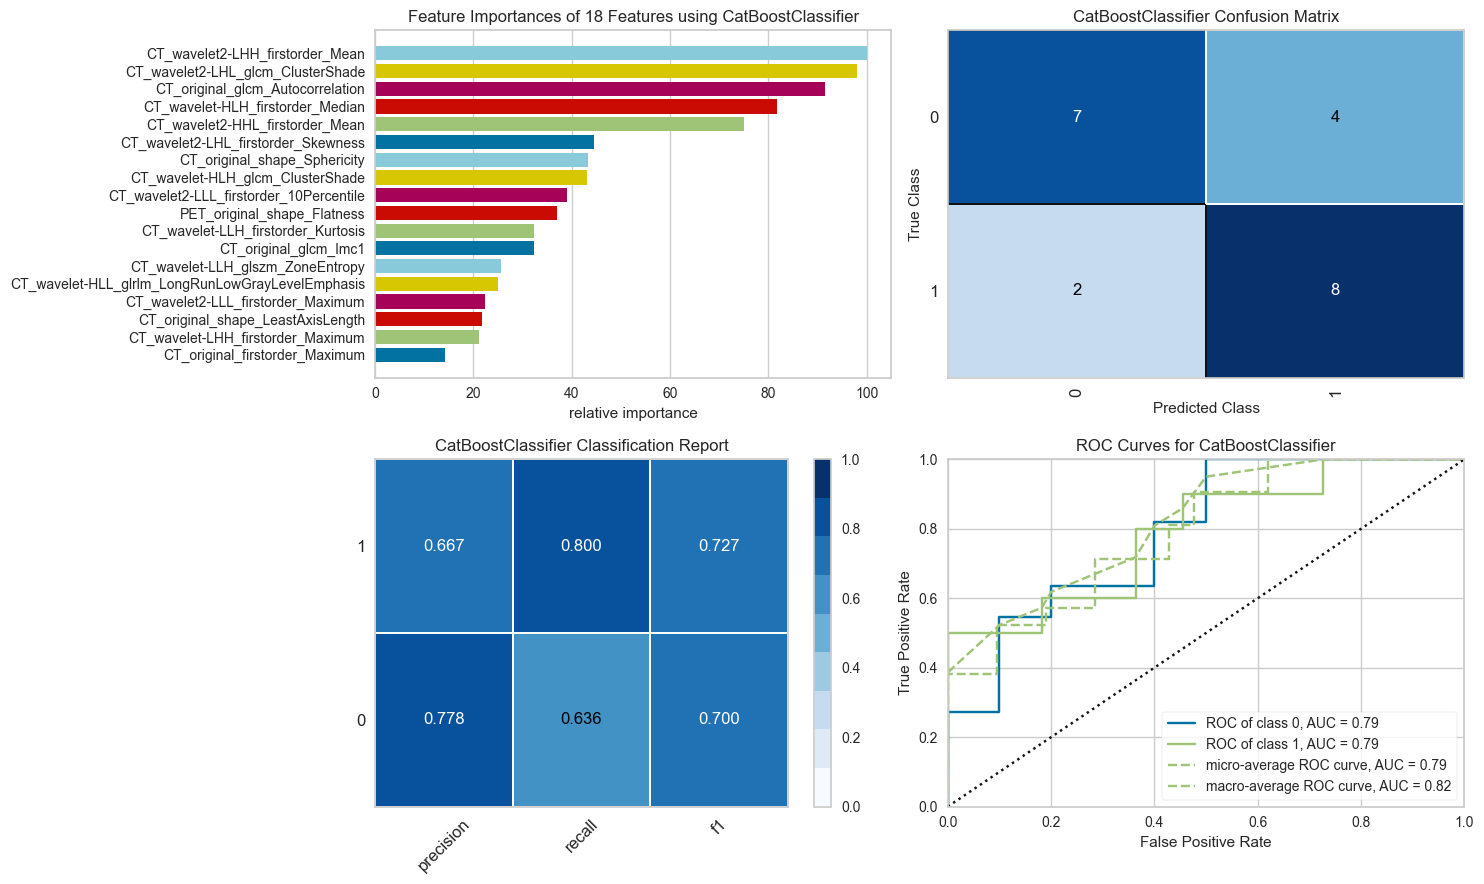

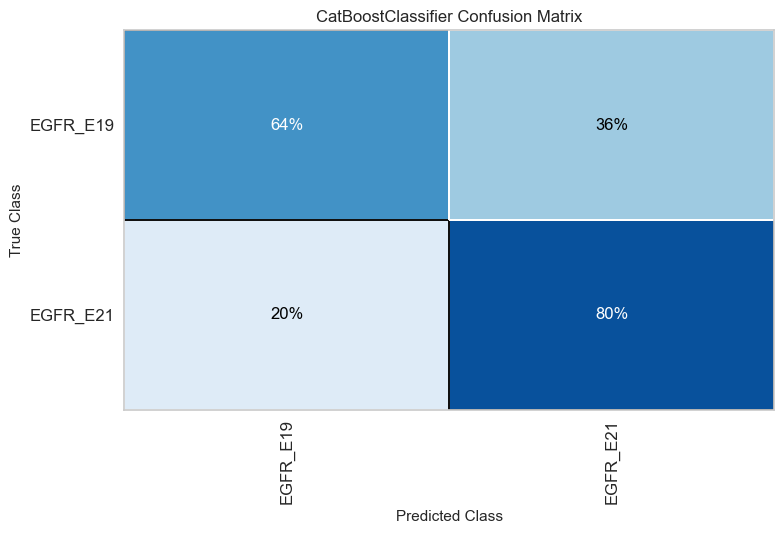

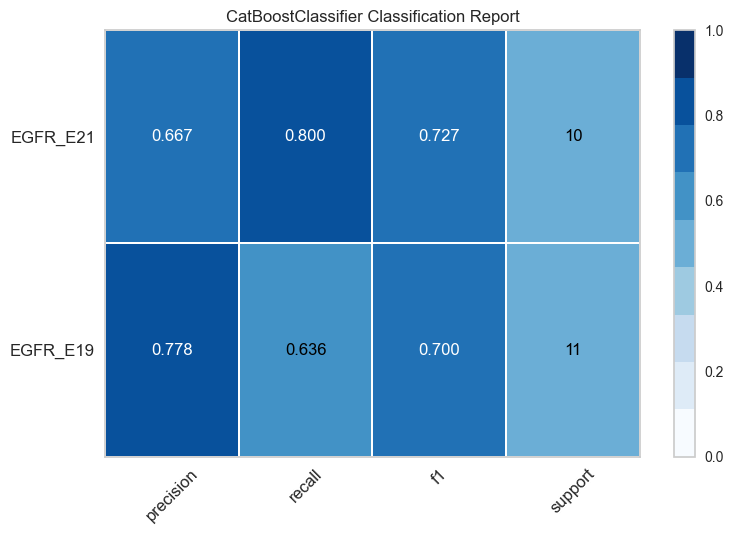

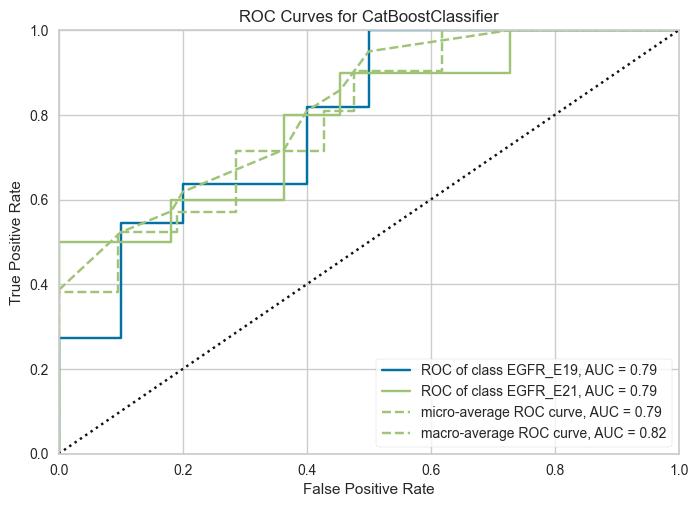

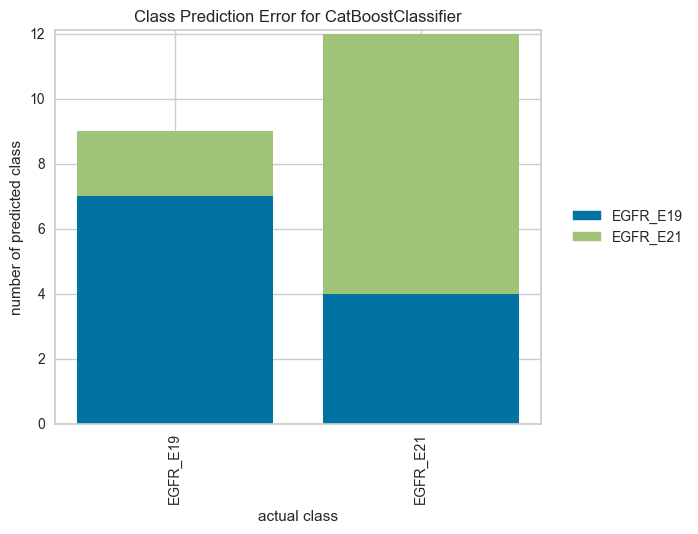

TypeError: __init__() got an unexpected keyword argument 'iterations'

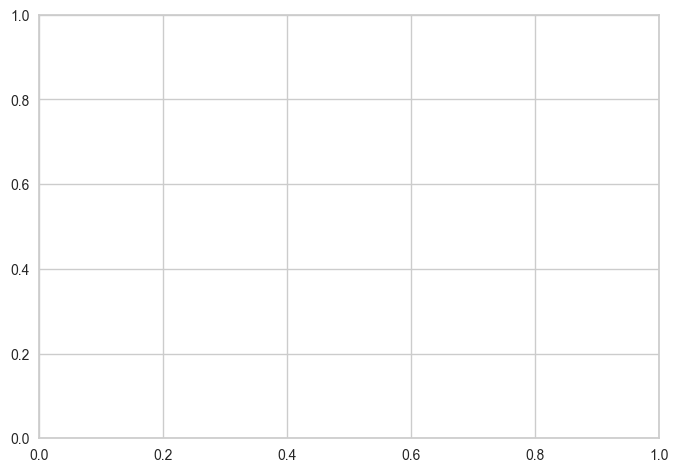

In [38]:
# Visualization of Results --> Feature Importances
cb_tuned1 = wrap(cb_tuned)
plot_feature_importances(cb_tuned1)
report_results_quickly(cb_tuned1)
plot_results(cb_tuned1)
plot_learning_curve(cb_tuned1)


In [45]:
# Final Model
adb_tuned = AdaBoostClassifier(**adb_cv_model.best_params_).fit(X_train, y_train)
y_pred = adb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.6666666666666666

In [46]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-STACK18-ADB73', Save_format = 'csv',Save_type = 'col')

In [47]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-STACK18-ADB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.67      0.73      0.70        11
    EGFR E21       0.67      0.60      0.63        10

    accuracy                           0.67        21
   macro avg       0.67      0.66      0.66        21
weighted avg       0.67      0.67      0.67        21

precision 0.6666666666666666 accuracy 0.6666666666666666 recall 0.6 auc 0.6636363636363637


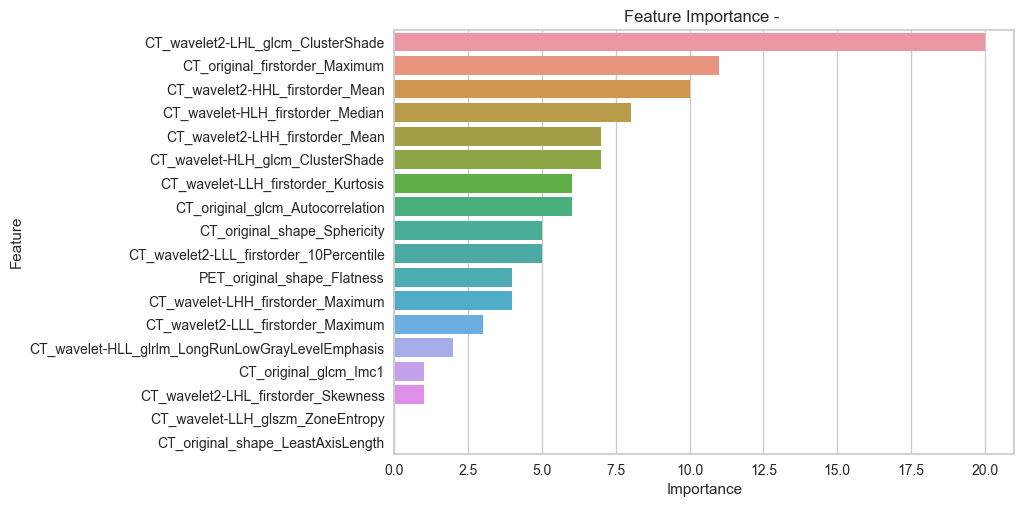

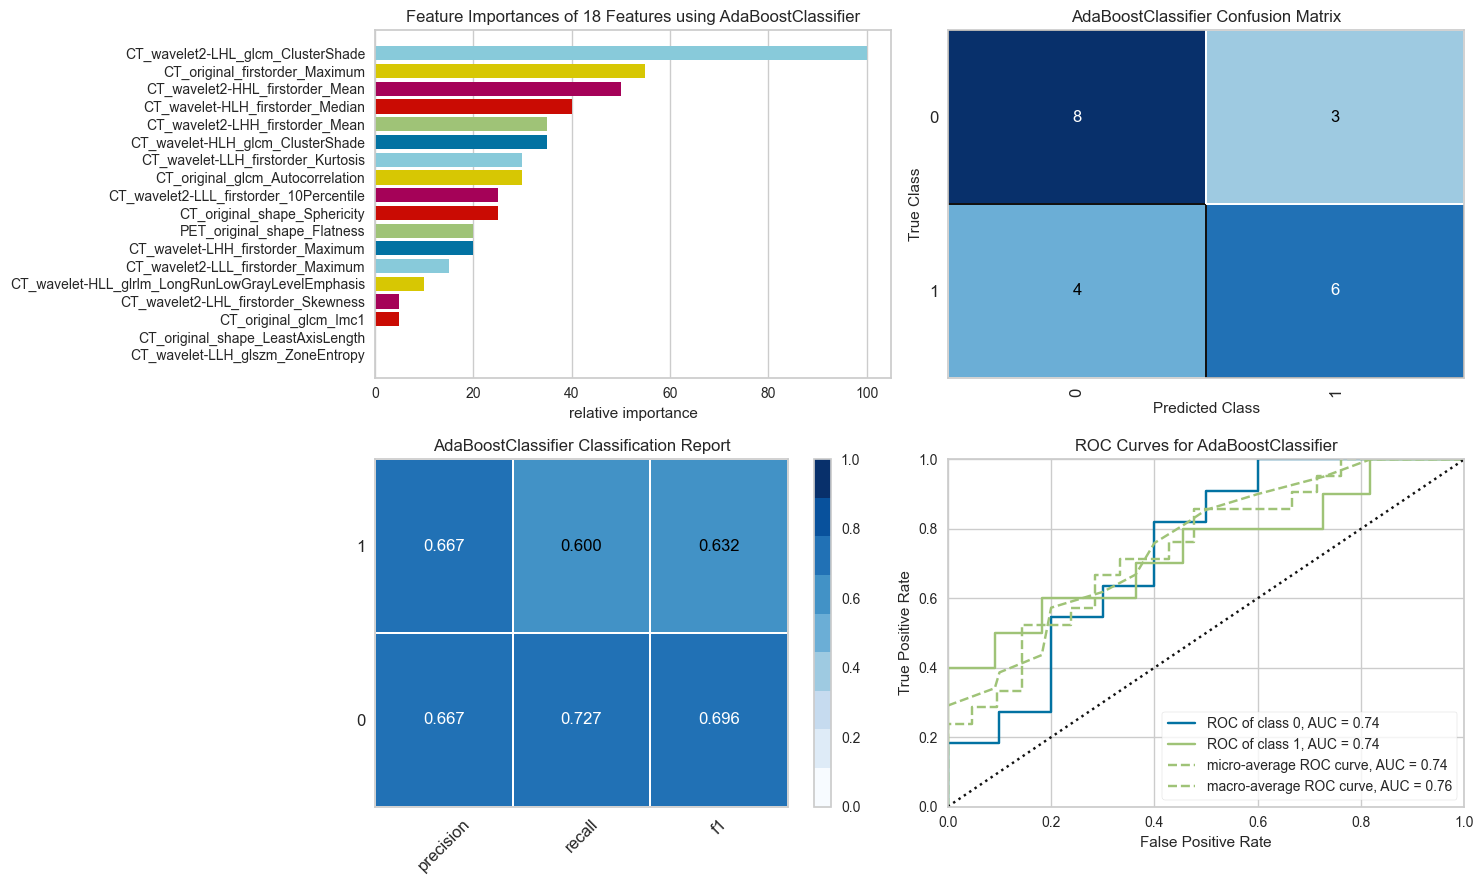

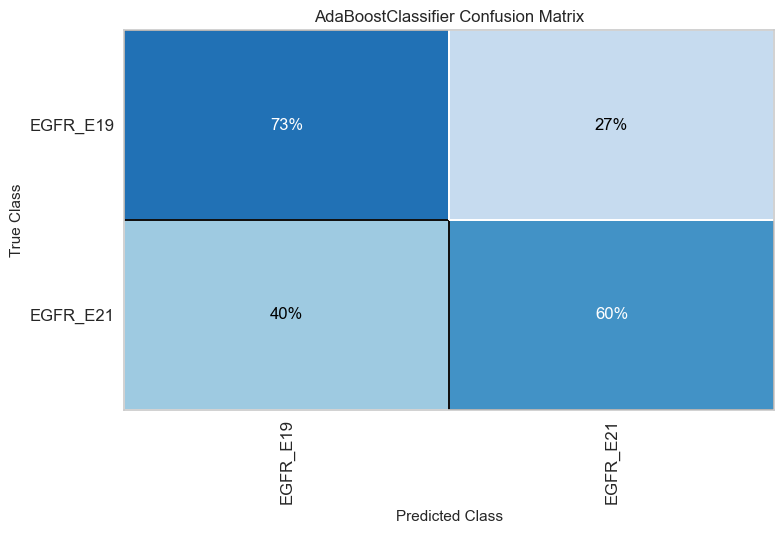

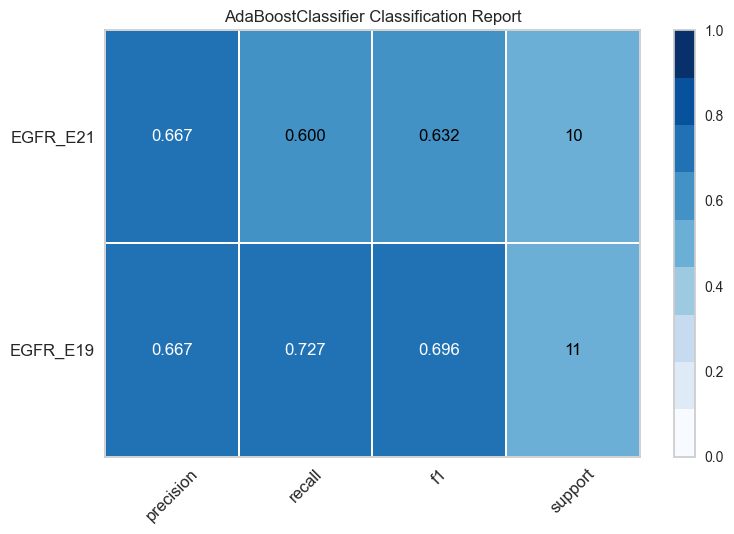

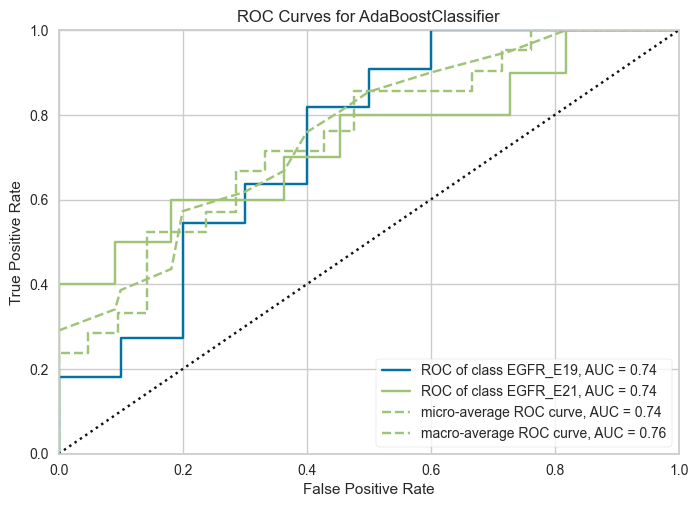

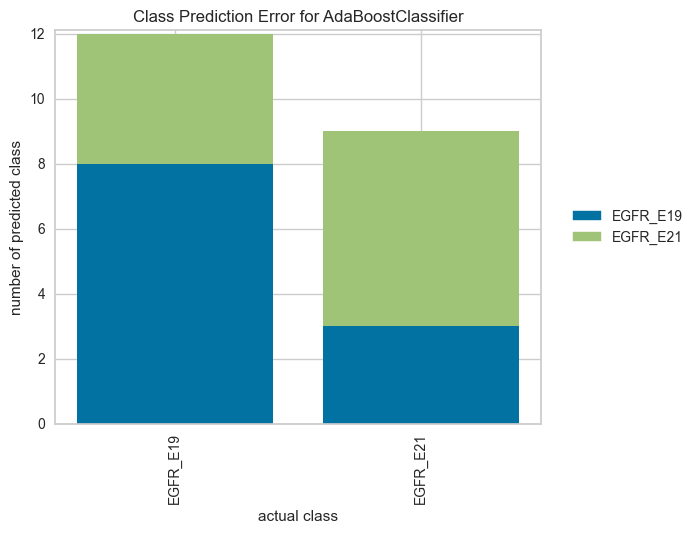

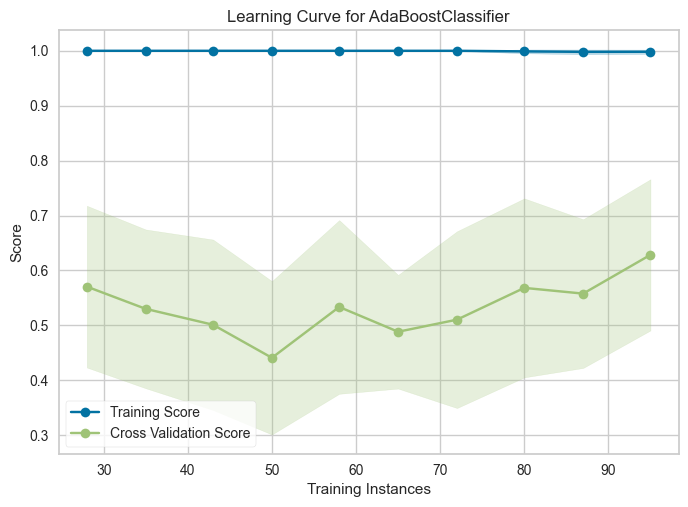

In [48]:
# # Visualization of Results --> Feature Importances
# # adb_tuned = wrap(adb_tuned)
plot_feature_importances(adb_tuned)

report_results_quickly(adb_tuned)
plot_results(adb_tuned)
plot_learning_curve(adb_tuned)

In [50]:
# Final Model
gbdt_tuned = GradientBoostingClassifier(**gbdt_cv_model.best_params_).fit(X_train, y_train)
y_pred = gbdt_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.7619047619047619

In [51]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-STACK18-gbdt', Save_format = 'csv',Save_type = 'col')

In [52]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-STACK18-gbdt.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.75      0.82      0.78        11
    EGFR E21       0.78      0.70      0.74        10

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.76      0.76      0.76        21

precision 0.7777777777777778 accuracy 0.7619047619047619 recall 0.7 auc 0.759090909090909


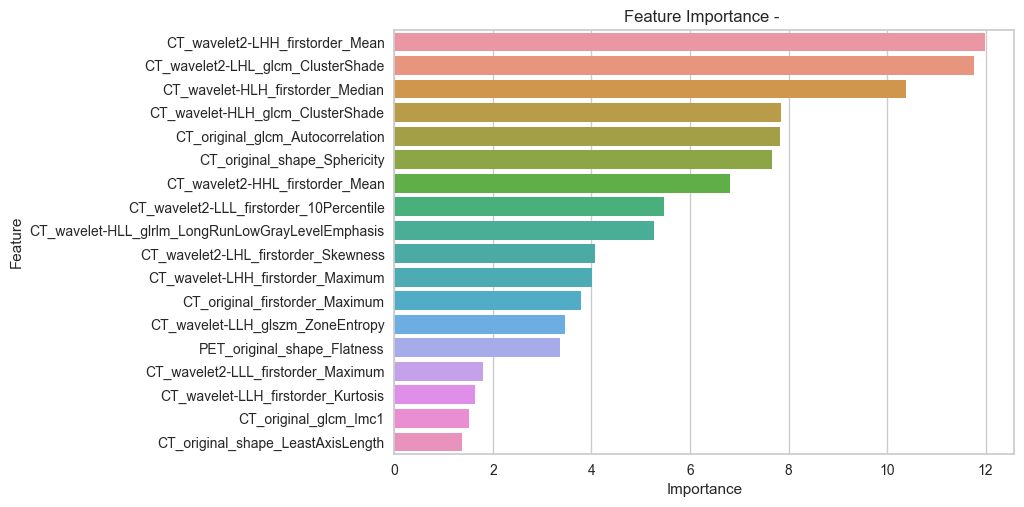

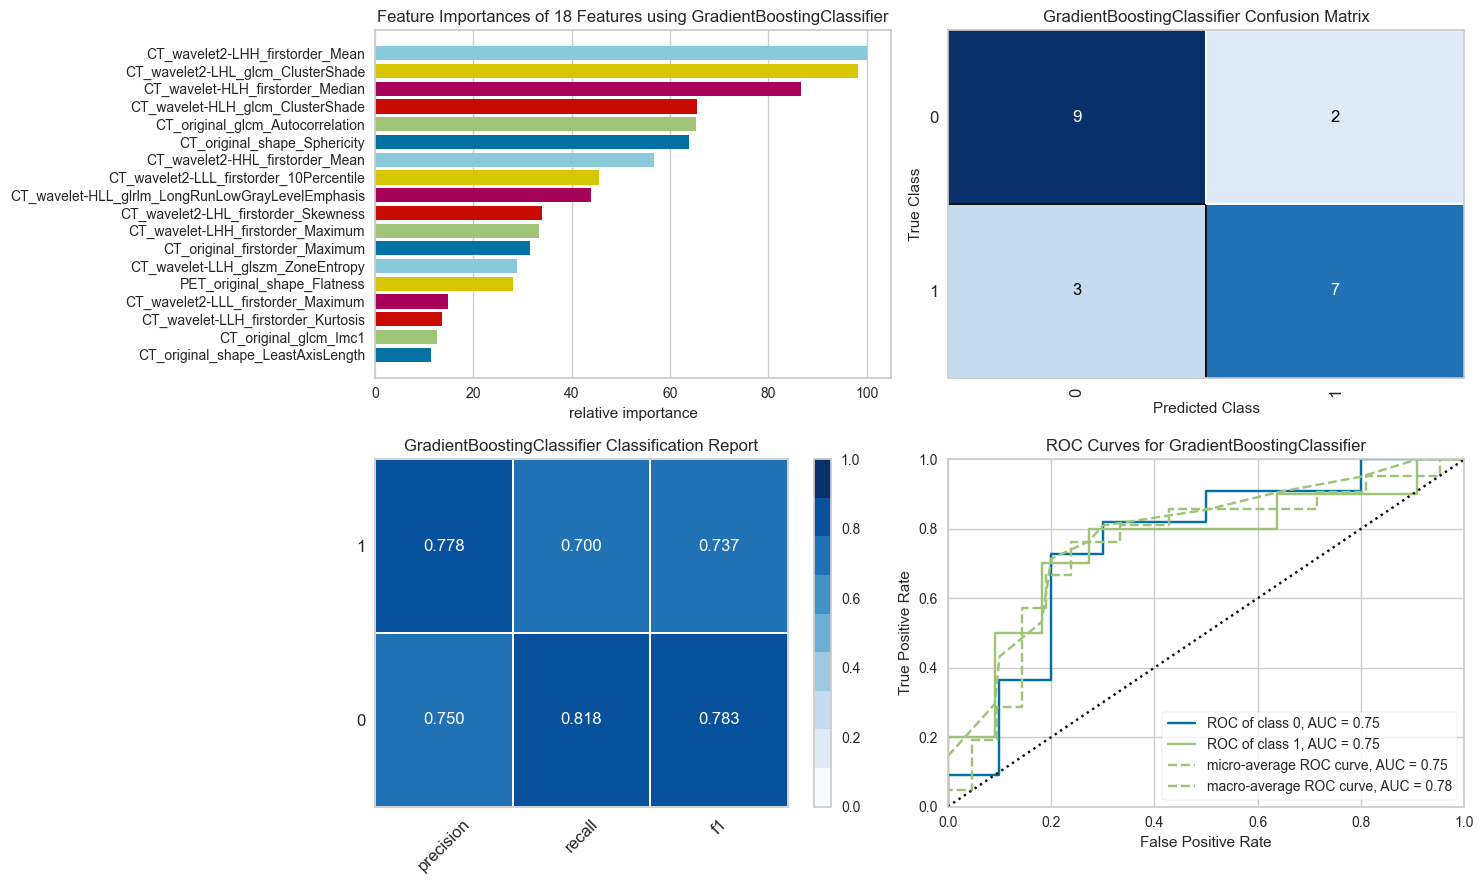

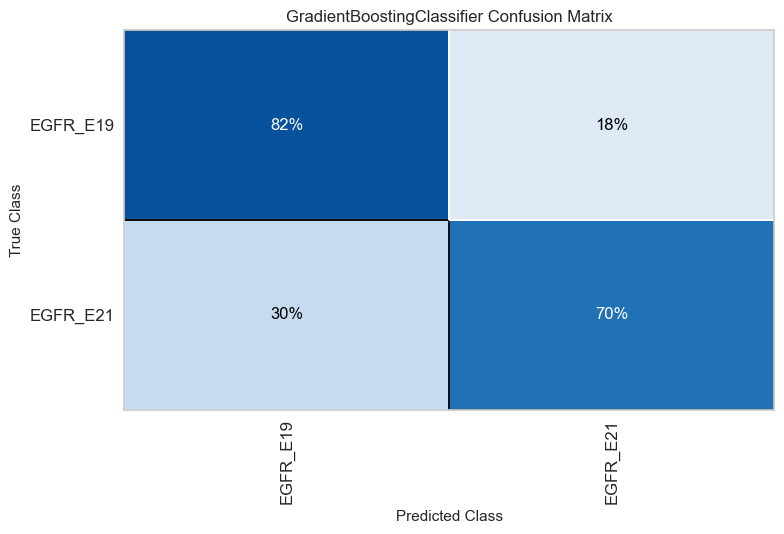

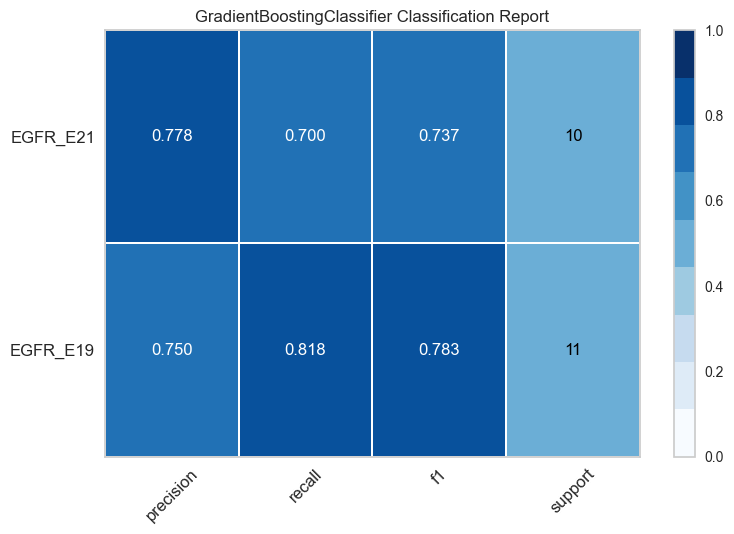

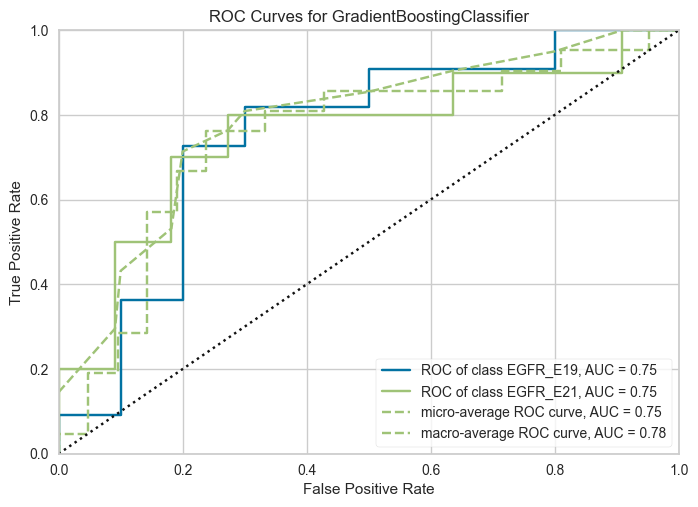

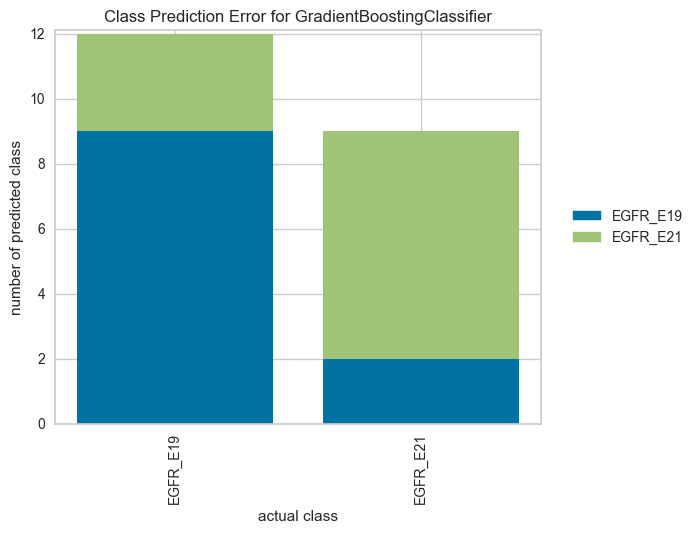

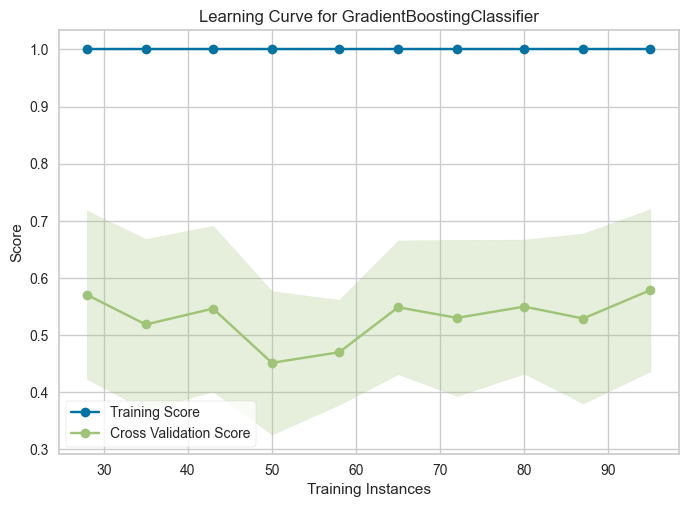

In [53]:
# # Visualization of Results --> Feature Importances
# # ngb_tuned = wrap(ngb_tuned)
plot_feature_importances(gbdt_tuned)

report_results_quickly(gbdt_tuned)
plot_results(gbdt_tuned)
plot_learning_curve(gbdt_tuned)

In [54]:
# dt_model = DecisionTreeClassifier()
# DecisionTreeClassifier.estimator.get_params().keys()

In [61]:
print(svm_model.best_params_)

{'C': 10, 'kernel': 'linear'}


In [62]:
# Final Model
svm_tuned = svm.SVC(**svm_model.best_params_).fit(X_train, y_train)
y_pred = svm_tuned.predict(X_test)
ACC = accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score = roc_auc_score(y_test, y_pred)

print(ACC,roc_auc_score)

0.5238095238095238 0.5272727272727273


In [63]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-STACK18-SVM73', Save_format = 'csv',Save_type = 'col')

In [64]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-STACK18-SVM73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.56      0.45      0.50        11
    EGFR E21       0.50      0.60      0.55        10

    accuracy                           0.52        21
   macro avg       0.53      0.53      0.52        21
weighted avg       0.53      0.52      0.52        21

precision 0.5 accuracy 0.5238095238095238 recall 0.6 auc 0.5272727272727273


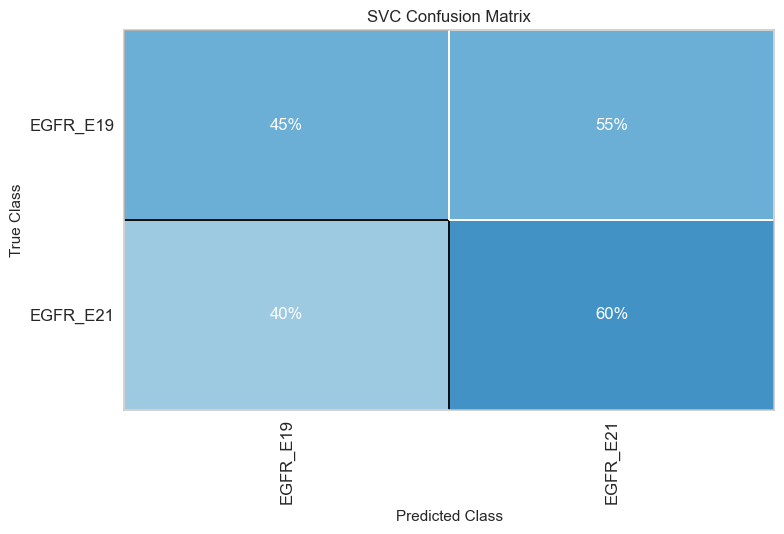

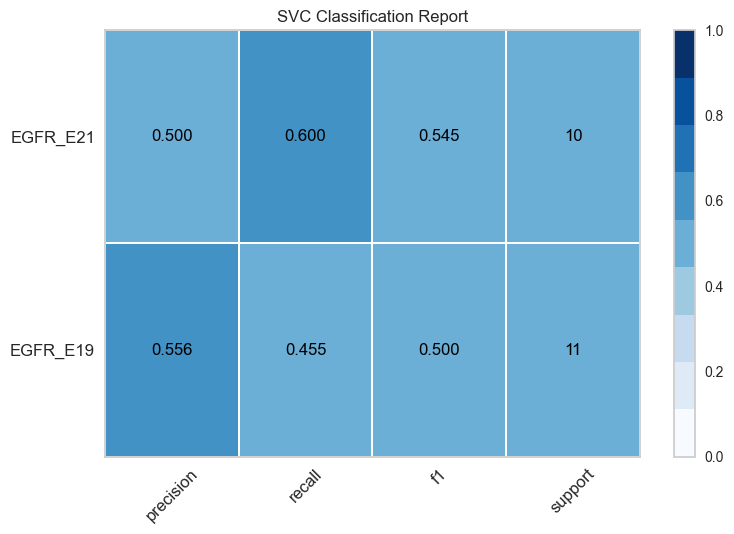

ModelError: no curves will be drawn; set binary=True.

In [65]:
# Visualization of Results --> Feature Importances
# svm_tuned1 = wrap(svm_tuned)
# plot_feature_importances(svm_tuned)
# report_results_quickly(svm_tuned)
plot_results(svm_tuned)
# plot_learning_curve(svm_tuned)

In [68]:
# Final Model
xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.5714285714285714

In [69]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-STACK18-XGB73', Save_format = 'csv',Save_type = 'col')

In [70]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-STACK18-XGB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.58      0.64      0.61        11
    EGFR E21       0.56      0.50      0.53        10

    accuracy                           0.57        21
   macro avg       0.57      0.57      0.57        21
weighted avg       0.57      0.57      0.57        21

precision 0.5555555555555556 accuracy 0.5714285714285714 recall 0.5 auc 0.5681818181818182


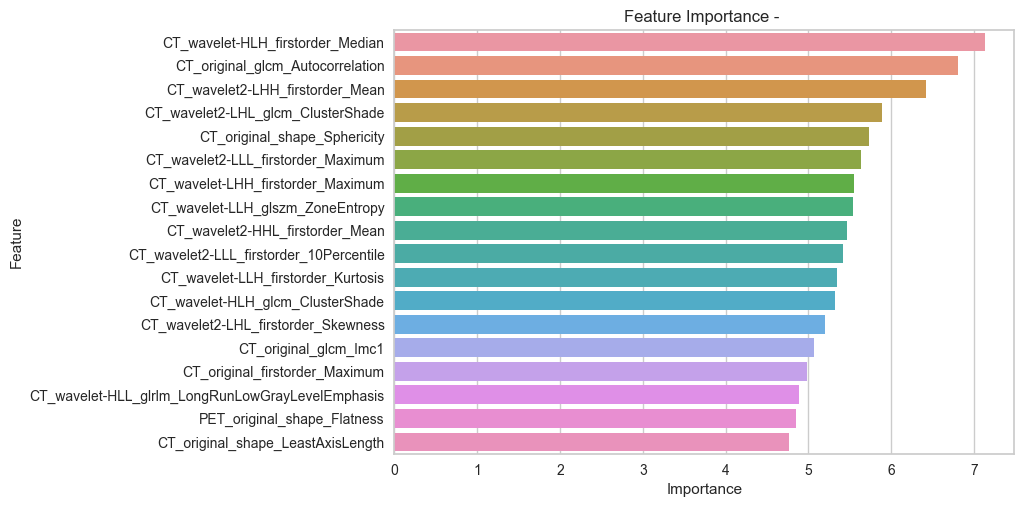

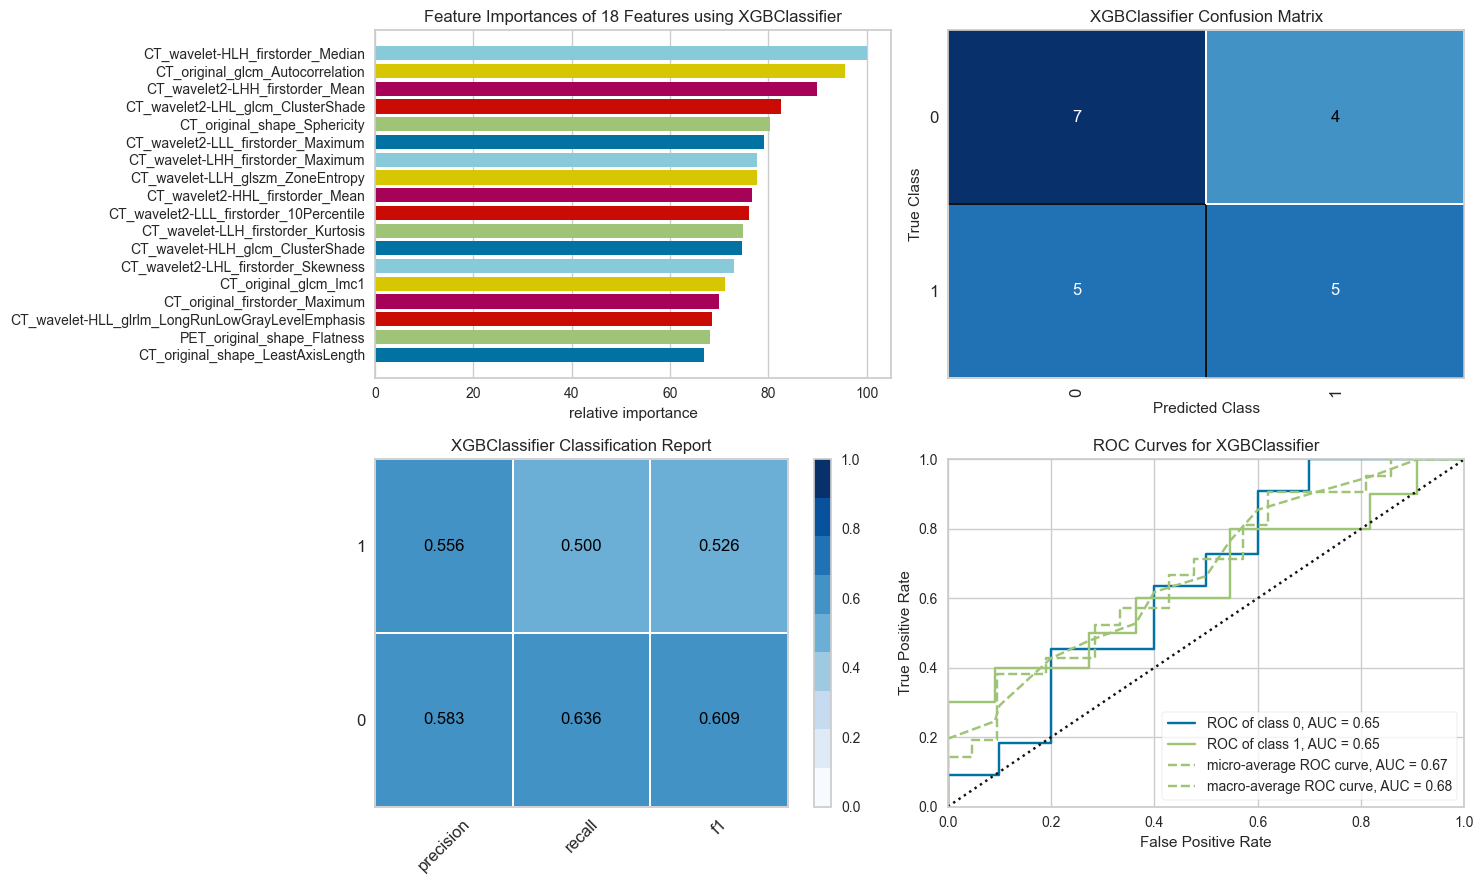

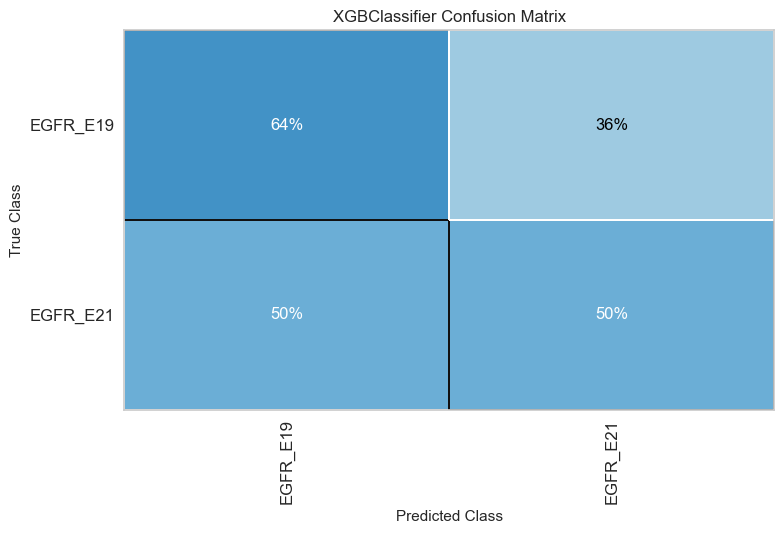

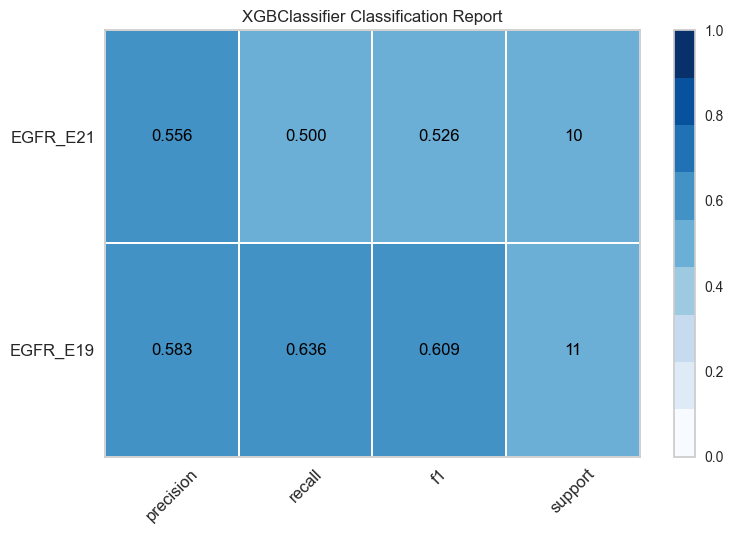

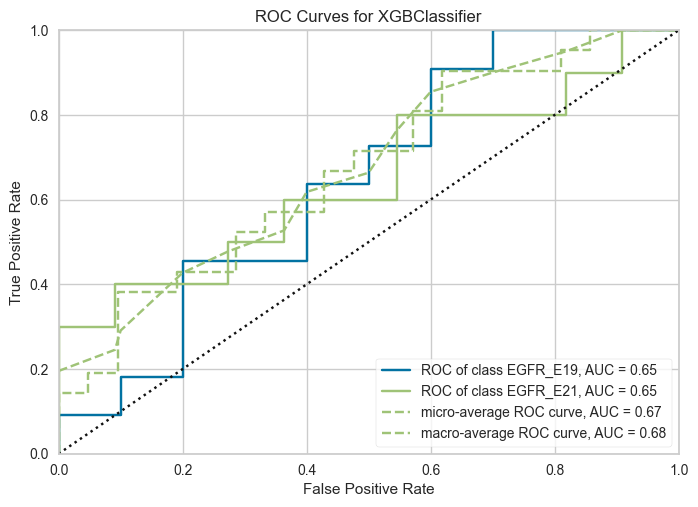

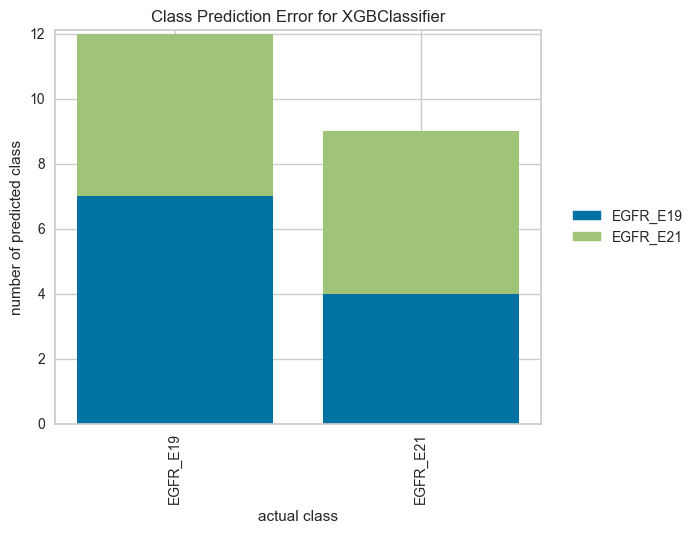

In [71]:
# Visualization of Results --> Feature Importances
plot_feature_importances(xgb_tuned)
report_results_quickly(xgb_tuned)
plot_results(xgb_tuned)
# plot_learning_curve(xgb_tuned)

In [74]:
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.47619047619047616

In [75]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-STACK18-lgb73', Save_format = 'csv',Save_type = 'col')

In [76]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-STACK18-lgb73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.50      0.55      0.52        11
    EGFR E21       0.44      0.40      0.42        10

    accuracy                           0.48        21
   macro avg       0.47      0.47      0.47        21
weighted avg       0.47      0.48      0.47        21

precision 0.4444444444444444 accuracy 0.47619047619047616 recall 0.4 auc 0.47272727272727266


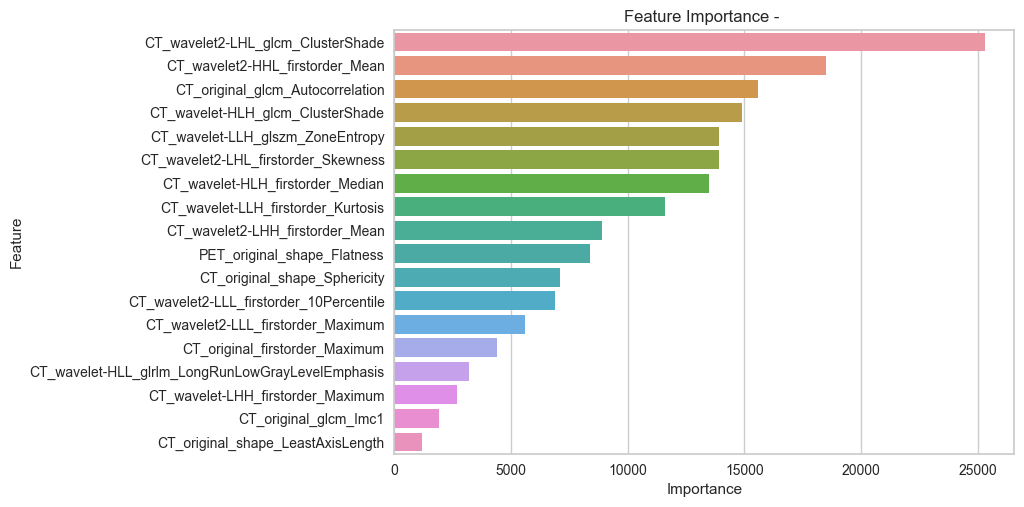

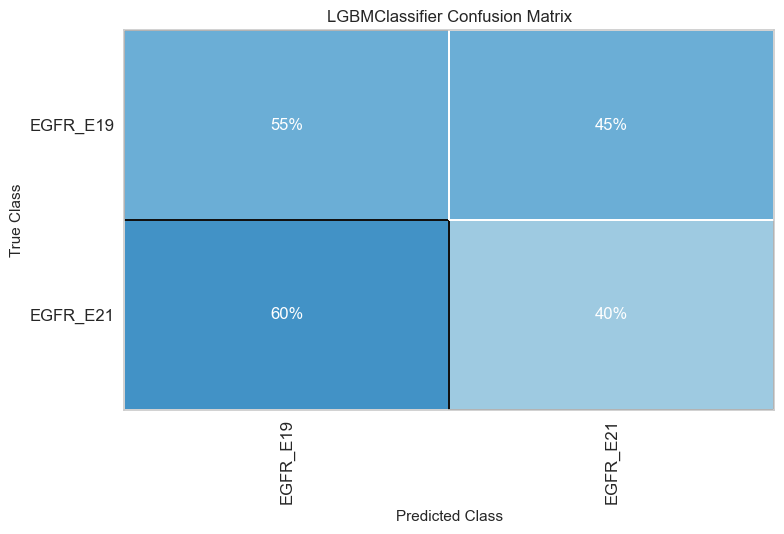

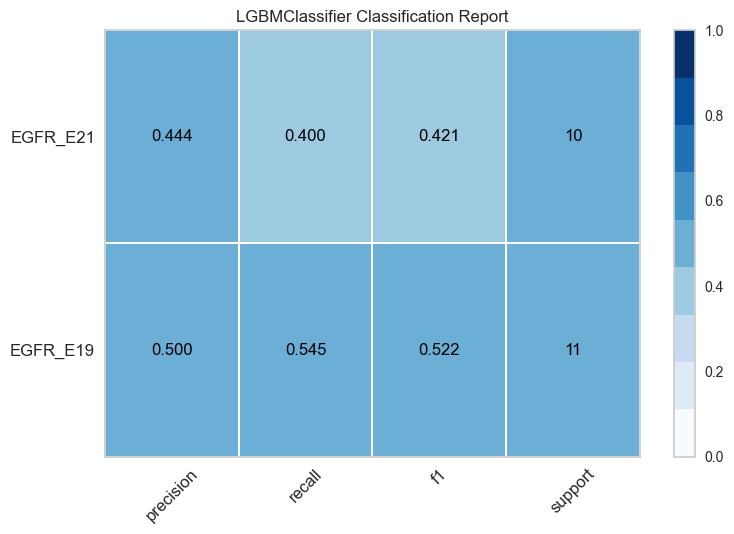

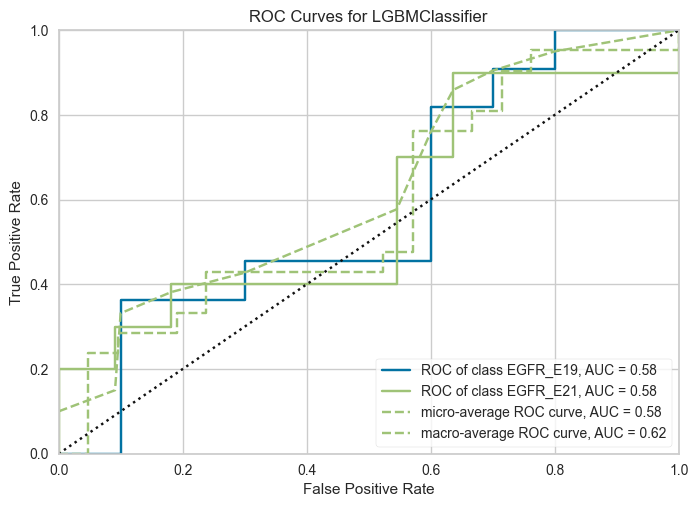

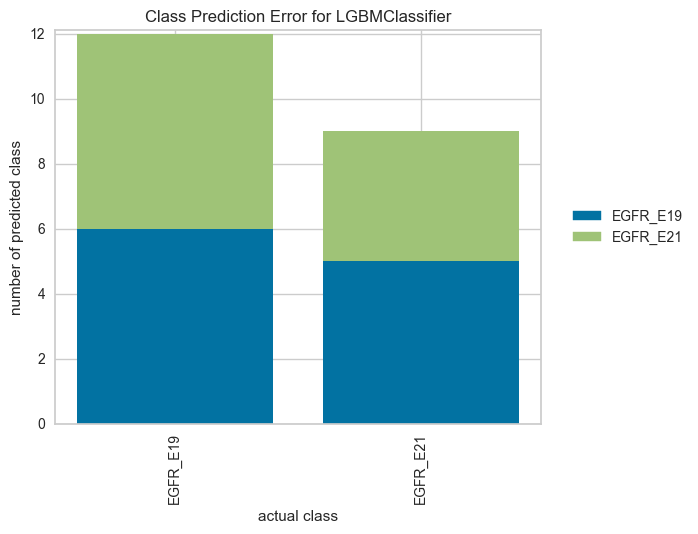

In [77]:
# Visualization of Results --> Feature Importances
plot_feature_importances(lgbm_tuned)
# report_results_quickly(lgbm_tuned)
plot_results(lgbm_tuned)
# plot_learning_curve(lgbm_tuned)

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.527273
RF: 0.713636
XGBoost: 0.568182
LightGBM: 0.472727
0:	learn: 0.6249825	total: 976us	remaining: 292ms
1:	learn: 0.5452868	total: 1.88ms	remaining: 280ms
2:	learn: 0.4903746	total: 2.77ms	remaining: 274ms
3:	learn: 0.4229120	total: 3.54ms	remaining: 262ms
4:	learn: 0.3670267	total: 4.3ms	remaining: 254ms
5:	learn: 0.3473574	total: 5.05ms	remaining: 248ms
6:	learn: 0.3053067	total: 5.8ms	remaining: 243ms
7:	learn: 0.2876676	total: 6.55ms	remaining: 239ms
8:	learn: 0.2696424	total: 7.33ms	remaining: 237ms
9:	learn: 0.2429666	total: 8.08ms	remaining: 234ms
10:	learn: 0.2066484	total: 8.84ms	remaining: 232ms
11:	learn: 0.1810604	total: 9.6ms	remaining: 230ms
12:	learn: 0.1609884	total: 10.3ms	remaining: 228ms
13:	learn: 0.1526788	total: 11.1ms	remaining: 227ms
14:	learn: 0.1377237	total: 11.9ms	remaining: 226ms
15:	learn: 0.1227085	total: 12.6ms	remaining: 224ms
16:	learn: 0.1097746	to

SVM: 0.527273
GBDT: 0.668182
[iter 0] loss=0.0764 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 100] loss=0.0764 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.0764 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.0764 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 400] loss=0.0738 val_loss=0.0000 scale=0.0001 norm=0.0001
NGBoost: 0.713636
DT: 0.500000
AdaBoost: 0.663636

################ Train and test results for the model: ################

               models  accuracy_train  accuracy_test
0  LogisticRegression           0.735          0.527
1                  RF           0.794          0.714
2             XGBoost           0.988          0.568
3            LightGBM           1.000          0.473
4            CatBoost           1.000          0.718
5                 SVM           0.723          0.527
6                GBDT           1.000          0.668
7             NGBoost           1.000          0.714
8                  DT           0.500          0.500

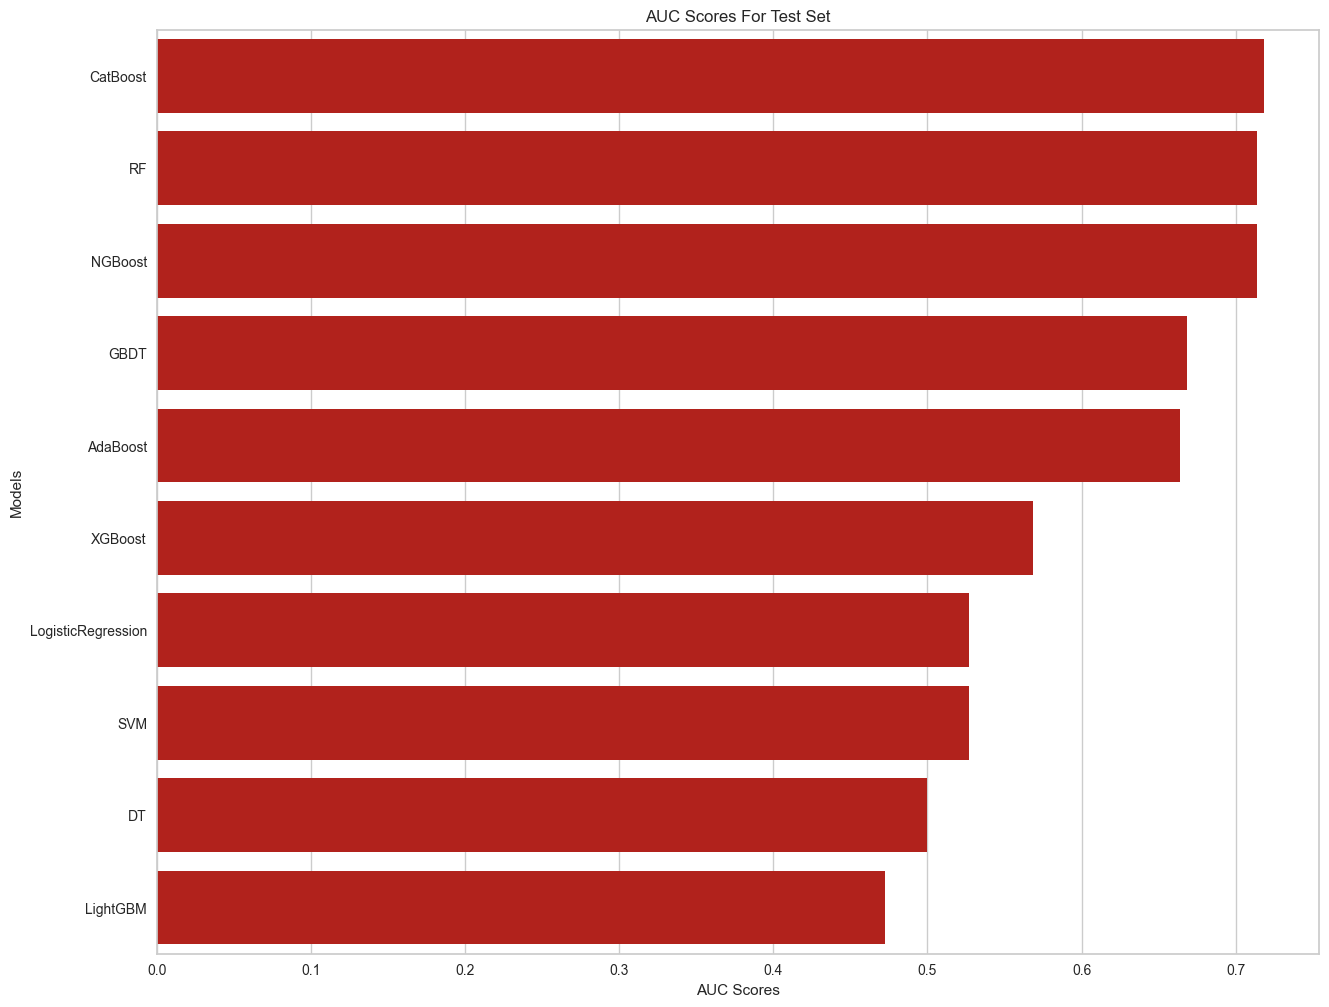

In [91]:
# Comparison of tuned models
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
tuned_models = [('LogisticRegression', logreg_tuned),
                ('RF', rf_tuned),
                ('XGBoost', xgb_tuned),
                ('LightGBM', lgbm_tuned),
               ('CatBoost', cb_tuned),
                ('SVM', svm_tuned),
                ('GBDT', gbdt_tuned),
                ('NGBoost', ngb_tuned),
                ('DT', dt_tuned),
                ('AdaBoost', adb_tuned)
               ]


evaluate_classification_model_holdout(tuned_models)

In [92]:
# Stack models
from mlxtend.classifier import StackingCVClassifier
stack_gen = StackingCVClassifier(classifiers=(logreg_tuned, rf_tuned, xgb_tuned, lgbm_tuned,cb_tuned,svm_tuned,gbdt_tuned,ngb_tuned,dt_tuned,adb_tuned), meta_classifier=lgbm_tuned)
stack_gen_model = stack_gen.fit(X_train, y_train)

evaluate_classification_model_holdout([('stack model', stack_gen_model)]) # 0.890


0:	learn: 0.5697840	total: 734us	remaining: 220ms
1:	learn: 0.5209131	total: 1.55ms	remaining: 231ms
2:	learn: 0.4235977	total: 2.15ms	remaining: 213ms
3:	learn: 0.3645830	total: 2.76ms	remaining: 204ms
4:	learn: 0.3047214	total: 3.36ms	remaining: 198ms
5:	learn: 0.2597370	total: 3.98ms	remaining: 195ms
6:	learn: 0.2264503	total: 4.55ms	remaining: 191ms
7:	learn: 0.1909686	total: 5.23ms	remaining: 191ms
8:	learn: 0.1708461	total: 5.89ms	remaining: 190ms
9:	learn: 0.1505986	total: 6.49ms	remaining: 188ms
10:	learn: 0.1395449	total: 7.11ms	remaining: 187ms
11:	learn: 0.1199146	total: 7.7ms	remaining: 185ms
12:	learn: 0.1076785	total: 8.29ms	remaining: 183ms
13:	learn: 0.0980287	total: 8.89ms	remaining: 182ms
14:	learn: 0.0865371	total: 9.47ms	remaining: 180ms
15:	learn: 0.0791667	total: 10.1ms	remaining: 180ms
16:	learn: 0.0750434	total: 10.8ms	remaining: 180ms
17:	learn: 0.0679464	total: 11.4ms	remaining: 178ms
18:	learn: 0.0605460	total: 12.1ms	remaining: 179ms
19:	learn: 0.0524820	tot

274:	learn: 0.0015729	total: 164ms	remaining: 14.9ms
275:	learn: 0.0015655	total: 165ms	remaining: 14.4ms
276:	learn: 0.0015586	total: 166ms	remaining: 13.8ms
277:	learn: 0.0015547	total: 166ms	remaining: 13.2ms
278:	learn: 0.0015515	total: 167ms	remaining: 12.6ms
279:	learn: 0.0015469	total: 167ms	remaining: 12ms
280:	learn: 0.0015397	total: 168ms	remaining: 11.4ms
281:	learn: 0.0015333	total: 169ms	remaining: 10.8ms
282:	learn: 0.0015273	total: 169ms	remaining: 10.2ms
283:	learn: 0.0015219	total: 170ms	remaining: 9.57ms
284:	learn: 0.0015217	total: 170ms	remaining: 8.96ms
285:	learn: 0.0015216	total: 171ms	remaining: 8.36ms
286:	learn: 0.0015193	total: 171ms	remaining: 7.76ms
287:	learn: 0.0015159	total: 172ms	remaining: 7.17ms
288:	learn: 0.0015159	total: 172ms	remaining: 6.56ms
289:	learn: 0.0015159	total: 173ms	remaining: 5.96ms
290:	learn: 0.0015159	total: 173ms	remaining: 5.36ms
291:	learn: 0.0015159	total: 174ms	remaining: 4.76ms
292:	learn: 0.0015159	total: 174ms	remaining: 4.

203:	learn: 0.0022540	total: 120ms	remaining: 56.4ms
204:	learn: 0.0022434	total: 121ms	remaining: 55.9ms
205:	learn: 0.0022315	total: 121ms	remaining: 55.3ms
206:	learn: 0.0022201	total: 122ms	remaining: 54.7ms
207:	learn: 0.0022087	total: 122ms	remaining: 54.1ms
208:	learn: 0.0021976	total: 123ms	remaining: 53.6ms
209:	learn: 0.0021864	total: 124ms	remaining: 53ms
210:	learn: 0.0021755	total: 124ms	remaining: 52.4ms
211:	learn: 0.0021646	total: 125ms	remaining: 51.8ms
212:	learn: 0.0021548	total: 125ms	remaining: 51.2ms
213:	learn: 0.0021437	total: 126ms	remaining: 50.6ms
214:	learn: 0.0021333	total: 127ms	remaining: 50ms
215:	learn: 0.0021207	total: 127ms	remaining: 49.4ms
216:	learn: 0.0021104	total: 128ms	remaining: 48.8ms
217:	learn: 0.0020994	total: 128ms	remaining: 48.2ms
218:	learn: 0.0020897	total: 129ms	remaining: 47.7ms
219:	learn: 0.0020803	total: 130ms	remaining: 47.1ms
220:	learn: 0.0020703	total: 130ms	remaining: 46.5ms
221:	learn: 0.0020600	total: 131ms	remaining: 46ms

215:	learn: 0.0023507	total: 167ms	remaining: 65.1ms
216:	learn: 0.0023507	total: 168ms	remaining: 64.4ms
217:	learn: 0.0023507	total: 169ms	remaining: 63.6ms
218:	learn: 0.0023507	total: 170ms	remaining: 62.8ms
219:	learn: 0.0023506	total: 170ms	remaining: 62ms
220:	learn: 0.0023508	total: 171ms	remaining: 61.1ms
221:	learn: 0.0023508	total: 172ms	remaining: 60.3ms
222:	learn: 0.0023505	total: 172ms	remaining: 59.5ms
223:	learn: 0.0023498	total: 173ms	remaining: 58.8ms
224:	learn: 0.0023435	total: 174ms	remaining: 58.1ms
225:	learn: 0.0023431	total: 175ms	remaining: 57.3ms
226:	learn: 0.0023431	total: 176ms	remaining: 56.5ms
227:	learn: 0.0023428	total: 177ms	remaining: 55.8ms
228:	learn: 0.0023426	total: 177ms	remaining: 55ms
229:	learn: 0.0023364	total: 178ms	remaining: 54.2ms
230:	learn: 0.0023217	total: 179ms	remaining: 53.4ms
231:	learn: 0.0023114	total: 180ms	remaining: 52.7ms
232:	learn: 0.0023084	total: 180ms	remaining: 51.9ms
233:	learn: 0.0022965	total: 181ms	remaining: 51.1

272:	learn: 0.0017119	total: 163ms	remaining: 16.2ms
273:	learn: 0.0017052	total: 164ms	remaining: 15.6ms
274:	learn: 0.0017015	total: 165ms	remaining: 15ms
275:	learn: 0.0016961	total: 165ms	remaining: 14.4ms
276:	learn: 0.0016953	total: 166ms	remaining: 13.8ms
277:	learn: 0.0016902	total: 166ms	remaining: 13.2ms
278:	learn: 0.0016789	total: 167ms	remaining: 12.6ms
279:	learn: 0.0016729	total: 168ms	remaining: 12ms
280:	learn: 0.0016693	total: 168ms	remaining: 11.4ms
281:	learn: 0.0016690	total: 169ms	remaining: 10.8ms
282:	learn: 0.0016690	total: 169ms	remaining: 10.2ms
283:	learn: 0.0016671	total: 170ms	remaining: 9.56ms
284:	learn: 0.0016633	total: 170ms	remaining: 8.97ms
285:	learn: 0.0016591	total: 171ms	remaining: 8.37ms
286:	learn: 0.0016590	total: 171ms	remaining: 7.76ms
287:	learn: 0.0016554	total: 172ms	remaining: 7.17ms
288:	learn: 0.0016509	total: 173ms	remaining: 6.57ms
289:	learn: 0.0016431	total: 173ms	remaining: 5.97ms
290:	learn: 0.0016388	total: 174ms	remaining: 5.38

183:	learn: 0.0024054	total: 119ms	remaining: 74.8ms
184:	learn: 0.0023909	total: 119ms	remaining: 74.3ms
185:	learn: 0.0023745	total: 120ms	remaining: 73.6ms
186:	learn: 0.0023602	total: 121ms	remaining: 73ms
187:	learn: 0.0023451	total: 121ms	remaining: 72.3ms
188:	learn: 0.0023308	total: 122ms	remaining: 71.7ms
189:	learn: 0.0023155	total: 123ms	remaining: 71ms
190:	learn: 0.0023019	total: 123ms	remaining: 70.3ms
191:	learn: 0.0022831	total: 124ms	remaining: 69.7ms
192:	learn: 0.0022685	total: 124ms	remaining: 69ms
193:	learn: 0.0022557	total: 125ms	remaining: 68.3ms
194:	learn: 0.0022418	total: 126ms	remaining: 67.7ms
195:	learn: 0.0022289	total: 126ms	remaining: 67ms
196:	learn: 0.0022113	total: 127ms	remaining: 66.4ms
197:	learn: 0.0021984	total: 128ms	remaining: 65.7ms
198:	learn: 0.0021855	total: 128ms	remaining: 65ms
199:	learn: 0.0021726	total: 129ms	remaining: 64.3ms
200:	learn: 0.0021606	total: 129ms	remaining: 63.6ms
201:	learn: 0.0021478	total: 130ms	remaining: 62.9ms
202

LinAlgError: Singular matrix

In [93]:
# Function ot blend models
def blend_models_predict(X_test):
    return ((0.05 * logreg_tuned.predict(X_test)) +
            (0.05 * dt_tuned.predict(X_test)) +
            (0.1 * gbdt_tuned.predict(X_test)) +
            (0.1 * rf_tuned.predict(X_test)) +
            (0.1 * svm_tuned.predict(X_test)) +
            (0.1 * adb_tuned.predict(X_test)) +
            (0.1 * xgb_tuned.predict(X_test)) +
            (0.1 * lgbm_tuned.predict(X_test)) +
            (0.1 * cb_tuned.predict(X_test)) +
             (0.1 * ngb_tuned.predict(X_test)) +
            (0.1 * stack_gen_model.predict(X_test)))

In [94]:
accuracy_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
# aucroc_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
roc_auc_score(y_test, blend_models_predict(X_test).round())

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [95]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-STACK18-stack73', Save_format = 'csv',Save_type = 'col')

In [96]:
# Pickle Models --> Saving tuned models

# Create a folder named 'Models'
# save working directory
#
# cur_dir = os.getcwd()
# cur_dir
#
# # change working directory:
os.chdir("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-1921-g2/RFE-RF-GB/STACK181")
#
# # Save the models
for model in tuned_models:
    pickle.dump(model[1], open(str(model[0]) + ".pkl", 'wb'))


In [97]:
import numpy as np
import pandas as pd
import pickle

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score

In [98]:
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-1.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFEGB8.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-42.csv",index=None)

PATHDATA1 = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/new-auc/testZscore-STACK18.csv"
external_test=pd.read_csv(PATHDATA1)
external_test_label = external_test.label
# print(external_test_label)
external_test=external_test.drop(columns=['label'])


In [99]:
OSPath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-1921-g2"

In [100]:
######CatBoost  测试集1

import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/STACK181/CatBoost.pkl'
finalpkl =  OSPath + pathpkl
cgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=cgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-cgb-STACK181-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# cgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/CatBoost.pkl', 'rb'))

# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-cgb-RFERF19-73.csv', external_test_pred, delimiter = ',')

auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR_E19       0.70      0.41      0.52        17
    EGFR_E21       0.47      0.75      0.58        12

    accuracy                           0.55        29
   macro avg       0.59      0.58      0.55        29
weighted avg       0.61      0.55      0.54        29

precision 0.47368421052631576 accuracy 0.5517241379310345 recall 0.75 auc 0.5808823529411764


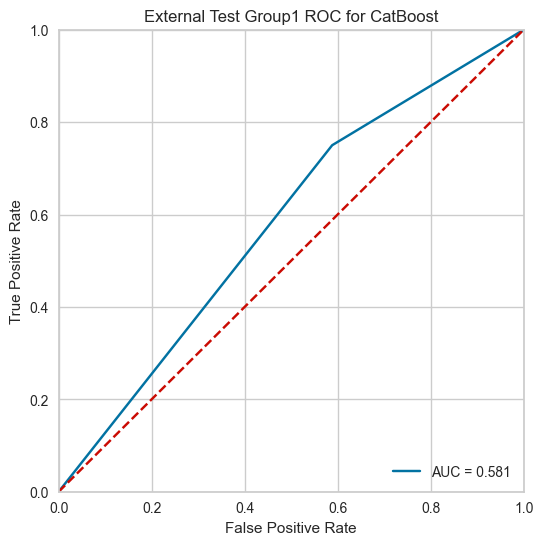

In [101]:
######CatBoost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for CatBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [102]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 7 10]
 [ 3  9]]
Normalized confusion matrix
[[0.41 0.59]
 [0.25 0.75]]


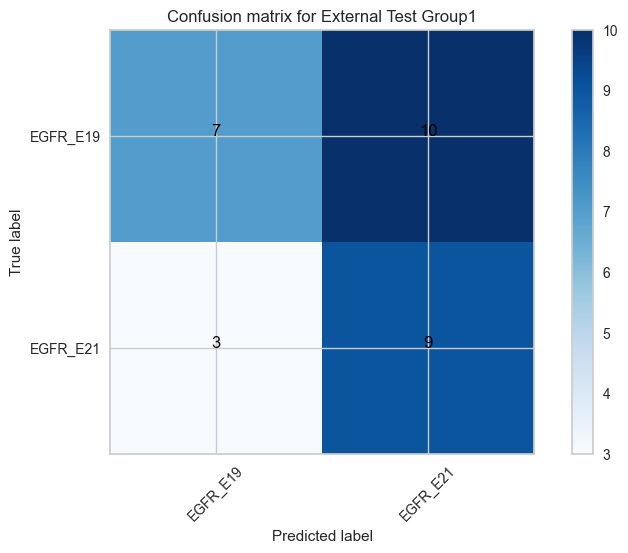

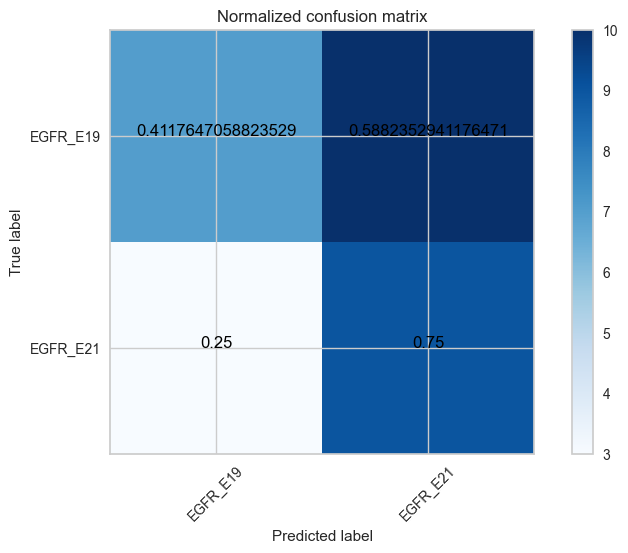

In [103]:
######CatBoost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [104]:
######adaboost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/STACK181/AdaBoost.pkl'
finalpkl =  OSPath + pathpkl
adb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=adb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-adb-STACK181-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# adb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/AdaBoost.pkl', 'rb'))
# external_test_pred=adb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-adb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR_E19       0.54      0.41      0.47        17
    EGFR_E21       0.38      0.50      0.43        12

    accuracy                           0.45        29
   macro avg       0.46      0.46      0.45        29
weighted avg       0.47      0.45      0.45        29

precision 0.375 accuracy 0.4482758620689655 recall 0.5 auc 0.4558823529411765


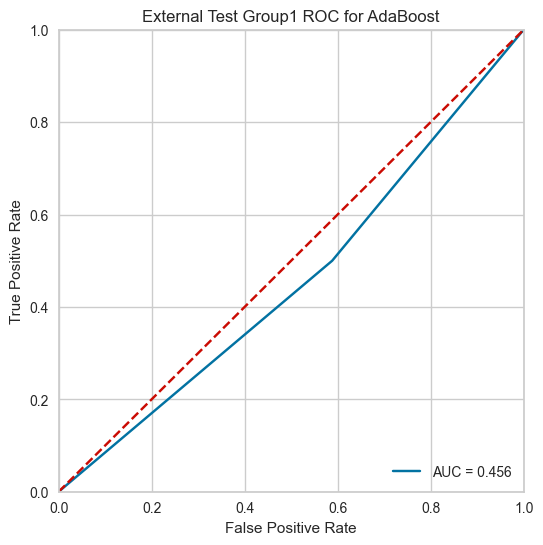

In [105]:
######adaboost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for AdaBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [106]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 7 10]
 [ 6  6]]
Normalized confusion matrix
[[0.41 0.59]
 [0.5  0.5 ]]


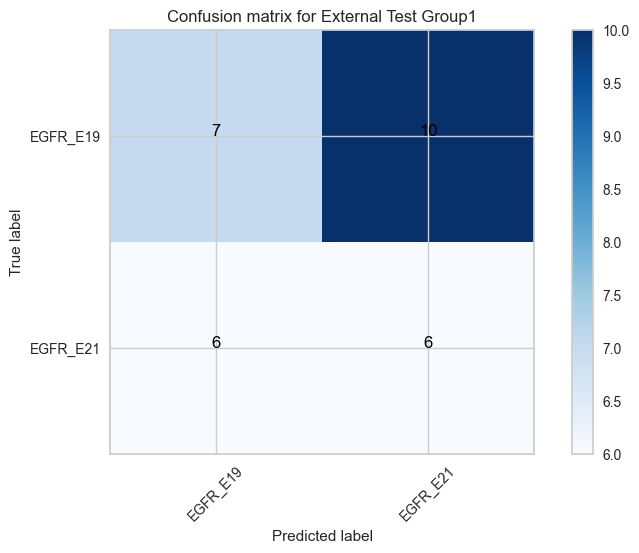

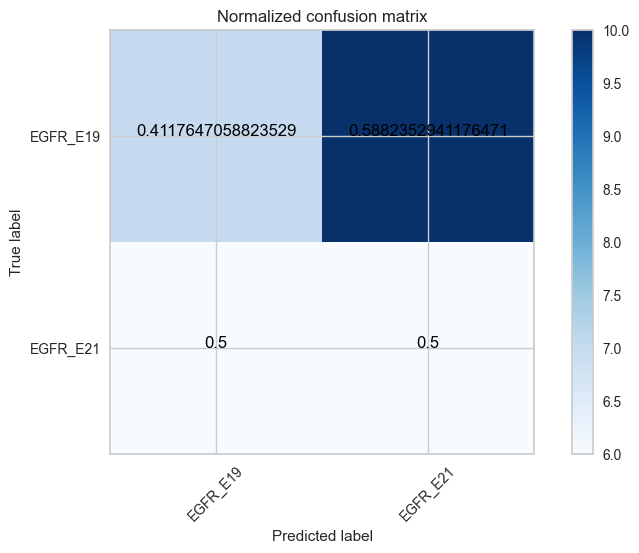

In [107]:
######adaboost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [108]:
######XGB  测试集1
import numpy as np
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/STACK181/XGBoost.pkl'
finalpkl =  OSPath + pathpkl
xgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=xgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-xgb-STACK181-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# xgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/XGBoost.pkl', 'rb'))
# external_test_pred=xgb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-xgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)
# precision 0.625 accuracy 0.6349206349206349 recall 0.7575757575757576 auc 0.6287878787878788
# precision    recall  f1-score   support

#     EGFR_E19       0.65      0.50      0.57        30
#     EGFR_E21       0.62      0.76      0.68        33

#     accuracy                           0.63        63
#    macro avg       0.64      0.63      0.63        63
# weighted avg       0.64      0.63      0.63        63


              precision    recall  f1-score   support

    EGFR_E19       0.54      0.41      0.47        17
    EGFR_E21       0.38      0.50      0.43        12

    accuracy                           0.45        29
   macro avg       0.46      0.46      0.45        29
weighted avg       0.47      0.45      0.45        29

precision 0.4567307692307692 accuracy 0.4482758620689655 recall 0.45588235294117646 auc 0.4558823529411765


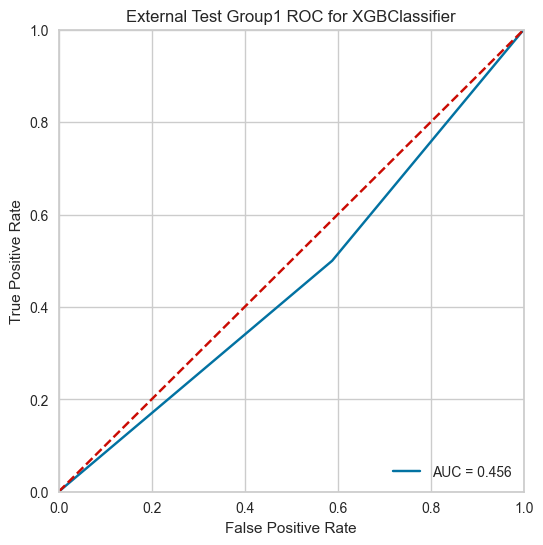

In [109]:
######XGB  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for XGBClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [110]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 7 10]
 [ 6  6]]
Normalized confusion matrix
[[0.41 0.59]
 [0.5  0.5 ]]


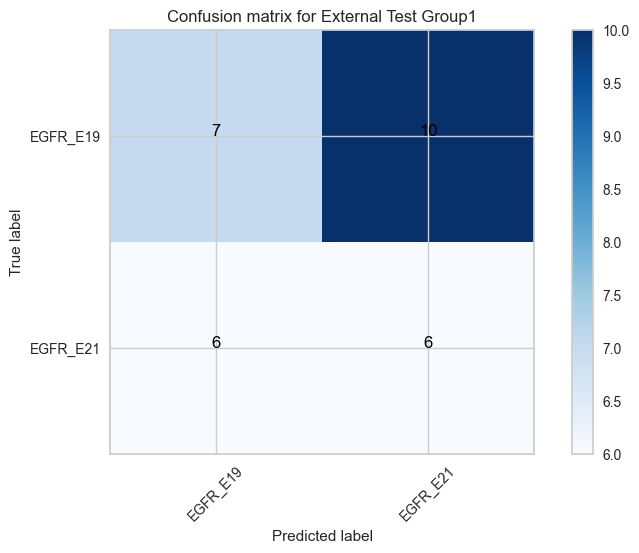

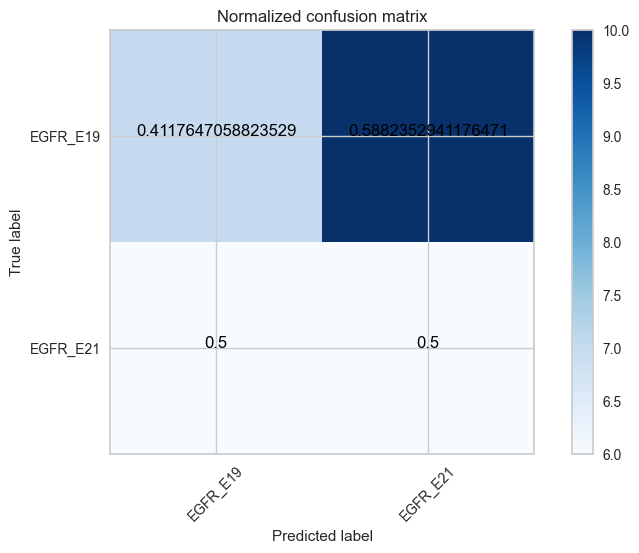

In [111]:
######XGB  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [112]:
#####RF  测试集1
import numpy as np
# # Load the model that we saved before
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/STACK181/RF.pkl'
finalpkl =  OSPath + pathpkl
rft = pickle.load(open(finalpkl, 'rb'))
external_test_pred=rft.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-RF-STACK181-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# rft = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/RF.pkl', 'rb'))
# external_test_pred=rft.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-RF-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.71      0.59      0.65        17
    EGFR_E21       0.53      0.67      0.59        12

    accuracy                           0.62        29
   macro avg       0.62      0.63      0.62        29
weighted avg       0.64      0.62      0.62        29

precision 0.5333333333333333 accuracy 0.6206896551724138 recall 0.6666666666666666 auc 0.6274509803921569


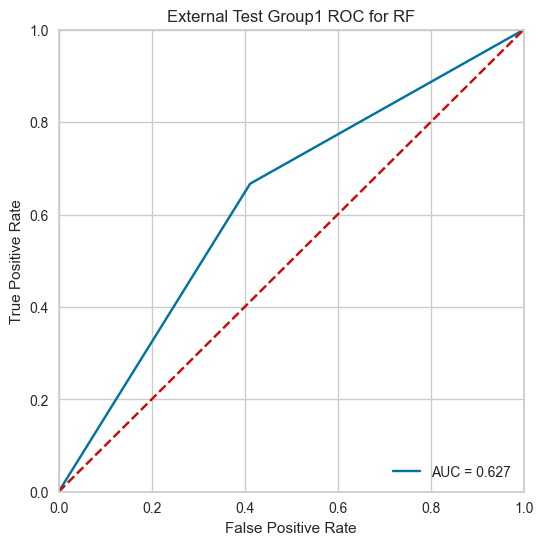

In [113]:
#####RF  测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[10  7]
 [ 4  8]]
Normalized confusion matrix
[[0.59 0.41]
 [0.33 0.67]]


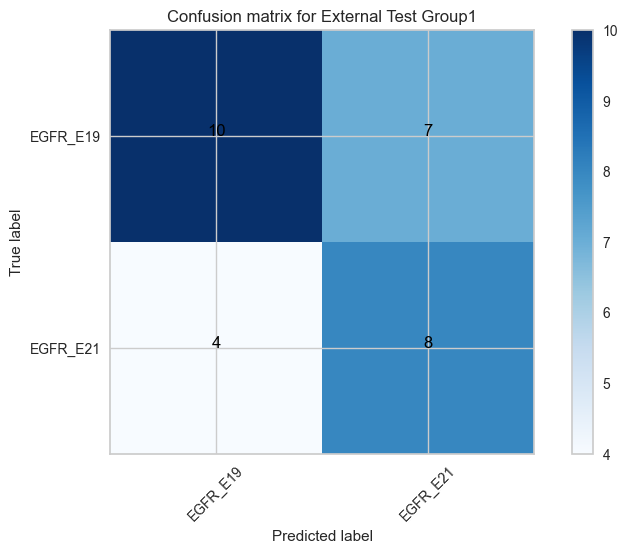

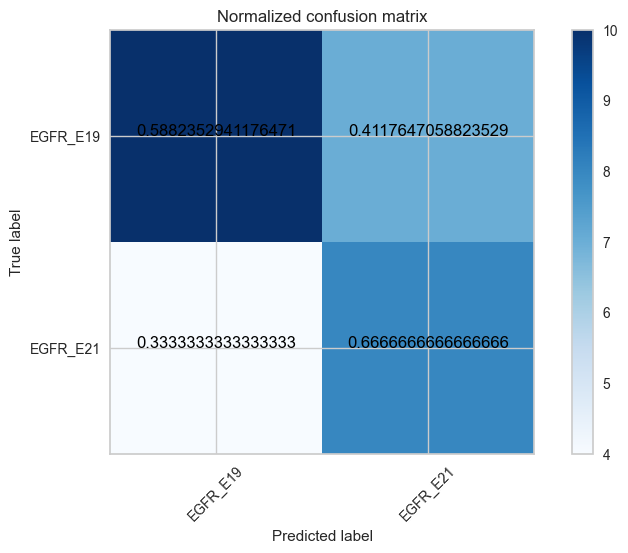

In [114]:
#####RF  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [115]:
######LR 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/STACK181/LogisticRegression.pkl'
finalpkl =  OSPath + pathpkl
lrt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lrt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lr-STACK181-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lrt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LogisticRegression.pkl', 'rb'))
# external_test_pred=lrt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lr-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR_E19       0.54      0.41      0.47        17
    EGFR_E21       0.38      0.50      0.43        12

    accuracy                           0.45        29
   macro avg       0.46      0.46      0.45        29
weighted avg       0.47      0.45      0.45        29

precision 0.375 accuracy 0.4482758620689655 recall 0.5 auc 0.4558823529411765


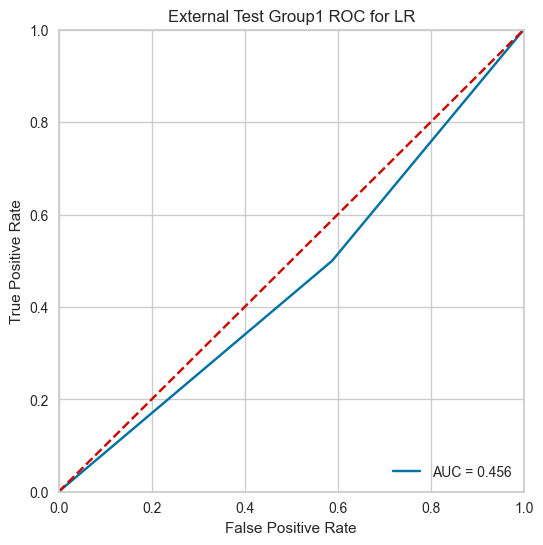

In [116]:
######LR 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[ 7 10]
 [ 6  6]]
Normalized confusion matrix
[[0.41 0.59]
 [0.5  0.5 ]]


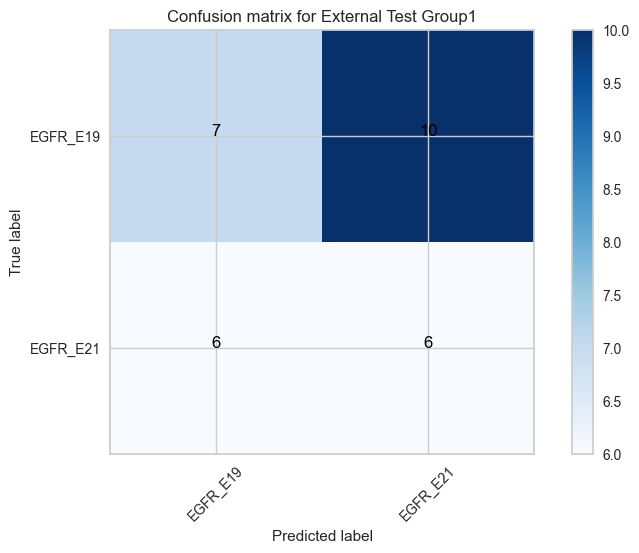

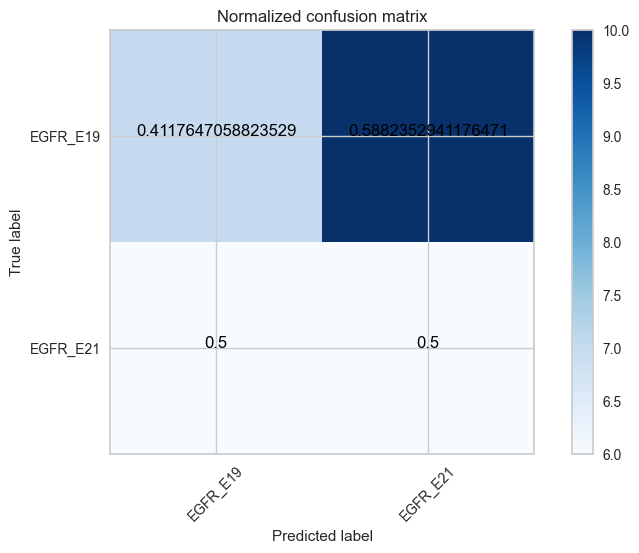

In [117]:
#####LR  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [118]:
##DT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/STACK181/DT.pkl'
finalpkl =  OSPath + pathpkl
dt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=dt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-DT-STACK181-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.59      1.00      0.74        17
    EGFR_E21       0.00      0.00      0.00        12

    accuracy                           0.59        29
   macro avg       0.29      0.50      0.37        29
weighted avg       0.34      0.59      0.43        29

precision 0.0 accuracy 0.5862068965517241 recall 0.0 auc 0.5


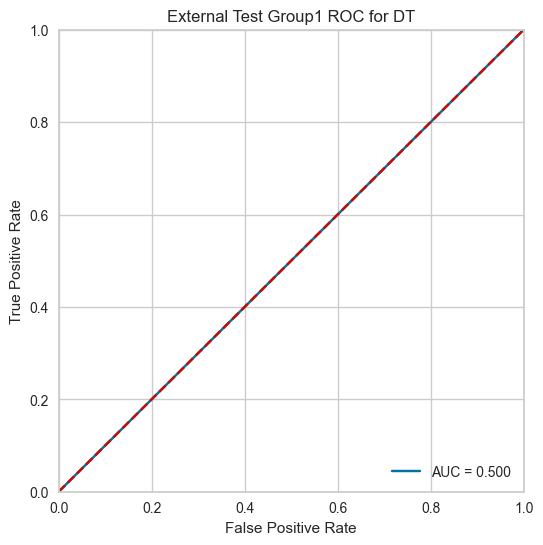

In [119]:
######dt 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[17  0]
 [12  0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


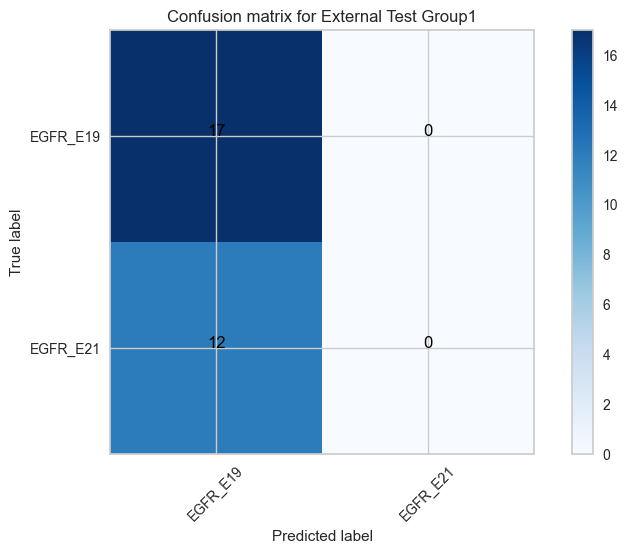

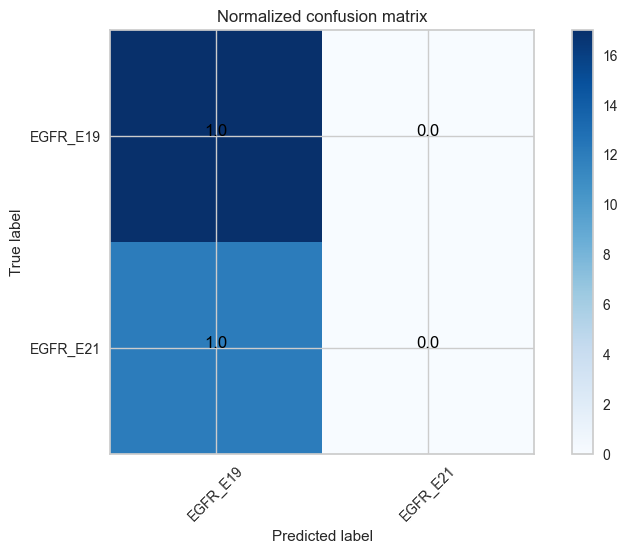

In [120]:
##dt 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [121]:
##NGB 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/STACK181/NGBoost.pkl'
finalpkl =  OSPath + pathpkl
ngb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=ngb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-ngb-STACK181-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.80      0.47      0.59        17
    EGFR_E21       0.53      0.83      0.65        12

    accuracy                           0.62        29
   macro avg       0.66      0.65      0.62        29
weighted avg       0.69      0.62      0.61        29

precision 0.5263157894736842 accuracy 0.6206896551724138 recall 0.8333333333333334 auc 0.6519607843137255


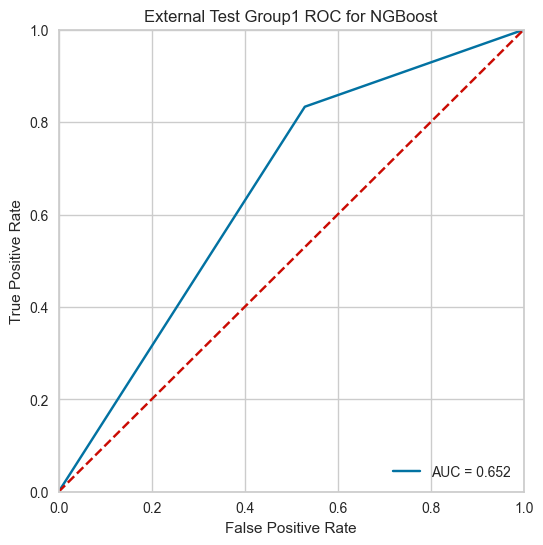

In [122]:
##NGB 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for NGBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[ 8  9]
 [ 2 10]]
Normalized confusion matrix
[[0.47 0.53]
 [0.17 0.83]]


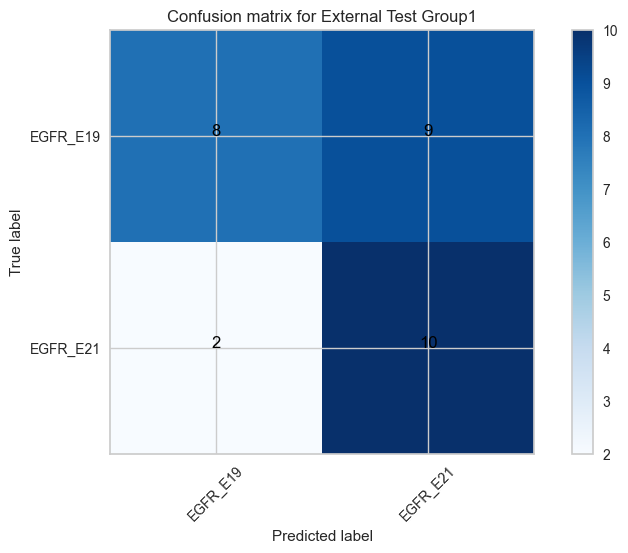

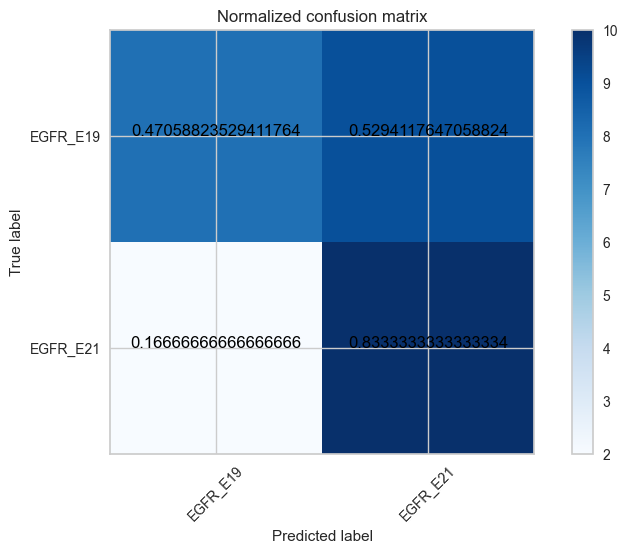

In [123]:
##NGB 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [124]:
##GBDT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/STACK181/GBDT.pkl'
finalpkl =  OSPath + pathpkl
GBDT = pickle.load(open(finalpkl, 'rb'))
external_test_pred=GBDT.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-GBDT-STACK181-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.62      0.29      0.40        17
    EGFR_E21       0.43      0.75      0.55        12

    accuracy                           0.48        29
   macro avg       0.53      0.52      0.47        29
weighted avg       0.54      0.48      0.46        29

precision 0.42857142857142855 accuracy 0.4827586206896552 recall 0.75 auc 0.5220588235294117


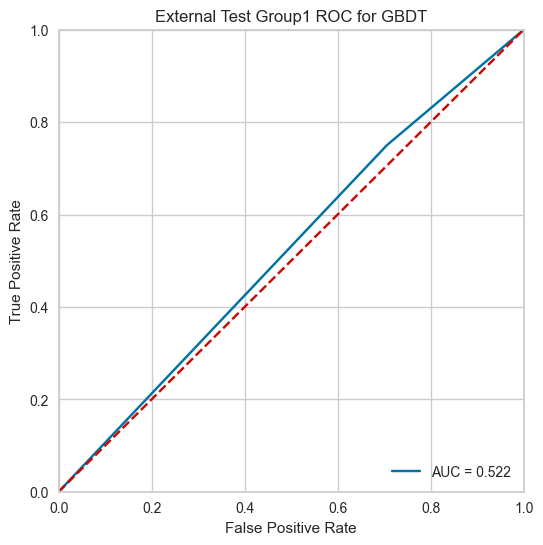

In [125]:
##GBDT 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for GBDT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[ 5 12]
 [ 3  9]]
Normalized confusion matrix
[[0.29 0.71]
 [0.25 0.75]]


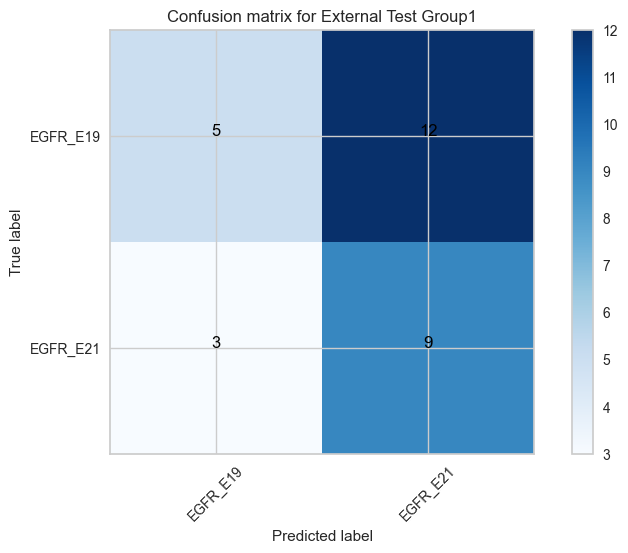

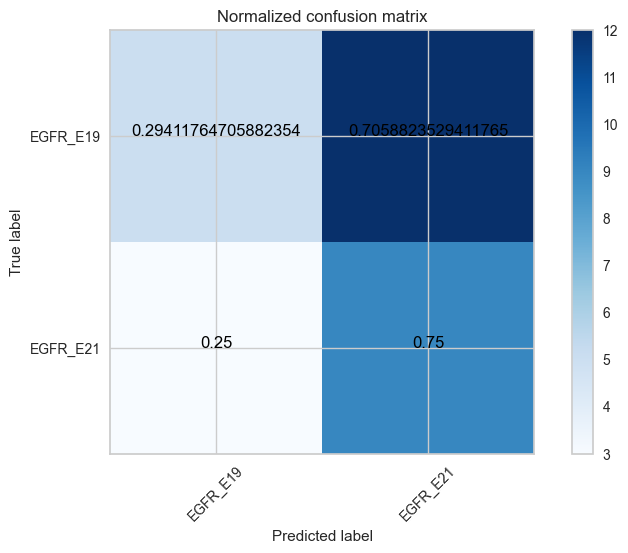

In [126]:
##GBDT 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [127]:
##svm 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/STACK181/SVM.pkl'
finalpkl =  OSPath + pathpkl
svmt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=svmt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-SVM-STACK181-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.47      0.41      0.44        17
    EGFR_E21       0.29      0.33      0.31        12

    accuracy                           0.38        29
   macro avg       0.38      0.37      0.37        29
weighted avg       0.39      0.38      0.38        29

precision 0.2857142857142857 accuracy 0.3793103448275862 recall 0.3333333333333333 auc 0.5220588235294117


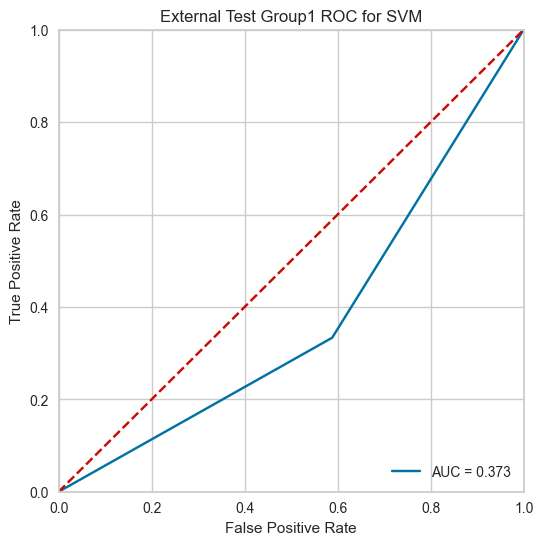

In [128]:
##svm 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for SVM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[ 7 10]
 [ 8  4]]
Normalized confusion matrix
[[0.41 0.59]
 [0.67 0.33]]


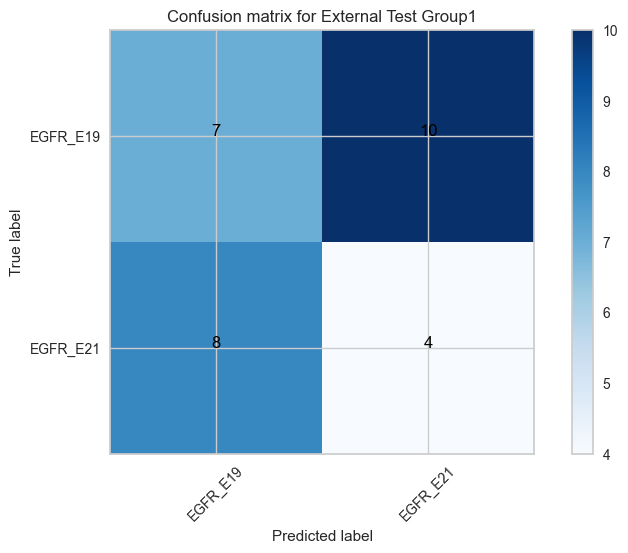

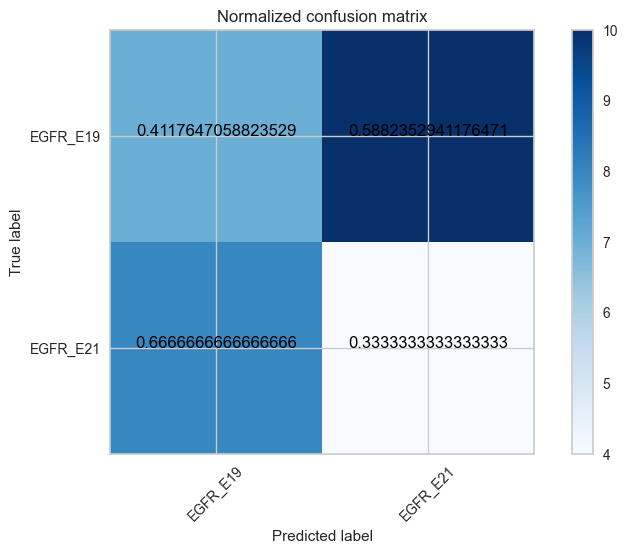

In [129]:
##svm 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [130]:
##lgb 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/STACK181/LightGBM.pkl'
finalpkl =  OSPath + pathpkl
lgbt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lgbt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lgb-STACK181-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.56      0.59      0.57        17
    EGFR_E21       0.36      0.33      0.35        12

    accuracy                           0.48        29
   macro avg       0.46      0.46      0.46        29
weighted avg       0.48      0.48      0.48        29

precision 0.36363636363636365 accuracy 0.4827586206896552 recall 0.3333333333333333 auc 0.46078431372549017


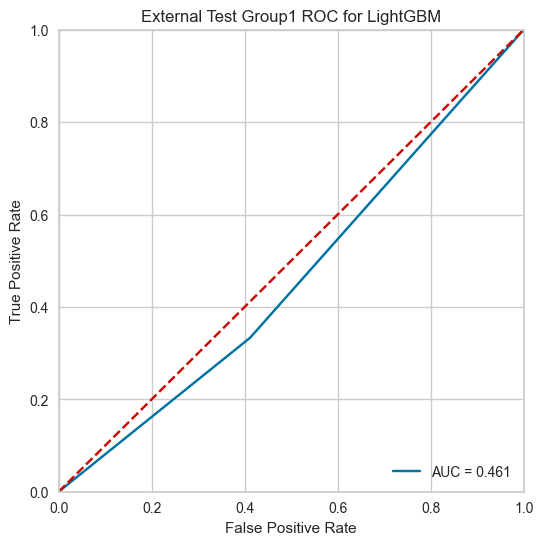

In [131]:
##lgb 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LightGBM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[10  7]
 [ 8  4]]
Normalized confusion matrix
[[0.59 0.41]
 [0.67 0.33]]


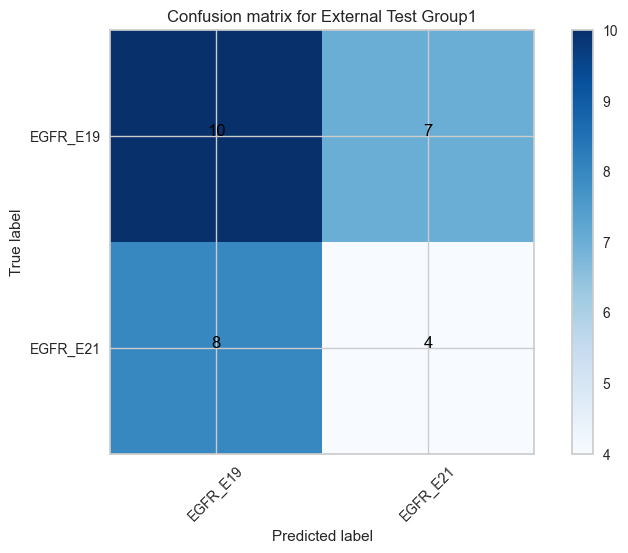

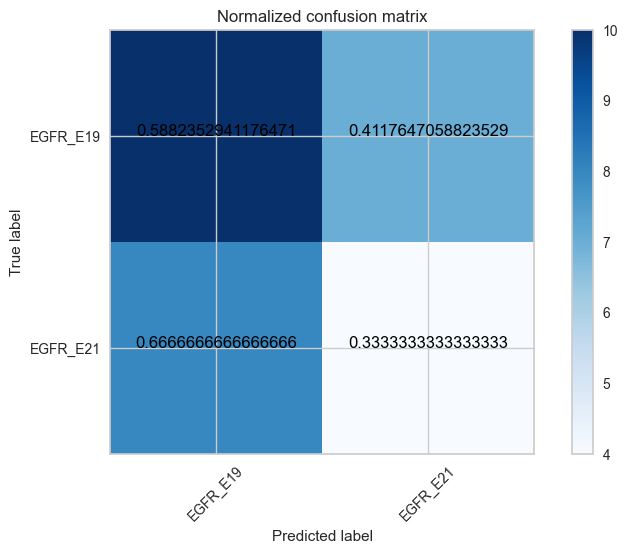

In [132]:
##lgb 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()